<a href="https://colab.research.google.com/github/sheikh495/Attach_lab/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is another sequence of instructions. Fill in the pipeline diagram using the same assumptions described for the example given in the instructions. You can recreate the diagram in the space below or upload a file in the last question of the assignment. Also assume traditional forwarding where it is possible. Explain the reason for each stall, if any occur.

1.fld          f0,0(x1)
2. fadd       f4,f0,f2
3.sub        x5,x5,x1
4.fld          f6,8(x1)
5.fsd         f4,0(x1)
6.fsd         f6,16(x1)
7.addi       x1,x1,-8

In [ ]:
import pandas as pd

# Initialize the pipeline diagram table/grid
pipeline = pd.DataFrame(columns=['Cycle', 'IF', 'ID', 'EX', 'MEM', 'WB','FADD','FWB'])
# Add the initial stage values to the pipeline diagram
pipeline.loc[0] = [0, '', '', '', '', '', '', '']
# Add the instructions to the pipeline diagram
instructions = [
    "fld          f0,0(x1)",
    "fadd       f4,f0,f2",
    "sub        x5,x5,x1",
    "fld          f6,8(x1)",
    "fsd         f4,0(x1)",
    "fsd         f6,16(x1)",
    "addi       x1,x1,-8"
]

# Iterate over each instruction
for cycle, instruction in enumerate(instructions, start=1):
    # Shift the instructions one stage forward
    pipeline.loc[cycle, 'Cycle'] = cycle
    pipeline.loc[cycle, 'IF'] = pipeline.loc[cycle-1, 'ID']
    pipeline.loc[cycle, 'ID'] = pipeline.loc[cycle-1, 'EX']
    pipeline.loc[cycle, 'EX'] = pipeline.loc[cycle-1, 'MEM']
    pipeline.loc[cycle, 'MEM'] = pipeline.loc[cycle-1, 'WB']
    pipeline.loc[cycle, 'WB'] = ''
    pipeline.loc[cycle, 'FADD'] = ''
    pipeline.loc[cycle, 'FWB'] = ''

    # Place the current instruction in the IF stage
    pipeline.loc[cycle, 'IF'] = instruction

# Display the pipeline diagram
print(pipeline)


   Cycle                     IF ID EX MEM WB FADD FWB
0    0.0                                             
1    1.0  fld          f0,0(x1)                      
2    2.0    fadd       f4,f0,f2                      
3    3.0    sub        x5,x5,x1                      
4    4.0  fld          f6,8(x1)                      
5    5.0   fsd         f4,0(x1)                      
6    6.0  fsd         f6,16(x1)                      
7    7.0    addi       x1,x1,-8                      


In [ ]:
import pandas as pd

# Initialize the pipeline diagram table/grid
pipeline = pd.DataFrame(columns=['Cycle', 'IF', 'ID', 'EX', 'MEM', 'WB', 'FADD', 'FWB'])

# Add the initial stage values to the pipeline diagram
pipeline.loc[0] = [0, '', '', '', '', '', '', '']

# Add the instructions to the pipeline diagram
instructions = [
    "fld          f0,0(x1)",
    "fadd       f4,f0,f2",
    "sub        x5,x5,x1",
    "fld          f6,8(x1)",
    "fsd         f4,0(x1)",
    "fsd         f6,16(x1)",
    "addi       x1,x1,-8"
]

# Iterate over each instruction
for cycle, instruction in enumerate(instructions, start=1):
    # Shift the instructions one stage forward
    pipeline.loc[cycle, 'Cycle'] = cycle
    pipeline.loc[cycle, 'IF'] = pipeline.loc[cycle - 1, 'ID']
    pipeline.loc[cycle, 'ID'] = pipeline.loc[cycle - 1, 'EX']
    pipeline.loc[cycle, 'EX'] = pipeline.loc[cycle - 1, 'MEM']
    pipeline.loc[cycle, 'MEM'] = pipeline.loc[cycle - 1, 'WB']
    pipeline.loc[cycle, 'WB'] = ''
    pipeline.loc[cycle, 'FADD'] = ''
    pipeline.loc[cycle, 'FWB'] = ''

    # Place the current instruction in the IF stage
    pipeline.loc[cycle, 'IF'] = instruction

# Display the pipeline diagram
pipeline
#print(pipeline)


,Cycle,IF,ID,EX,MEM,WB,FADD,FWB
0,0.0,,,,,,,
1,1.0,"fld f0,0(x1)",,,,,,
2,2.0,"fadd f4,f0,f2",,,,,,
3,3.0,"sub x5,x5,x1",,,,,,
4,4.0,"fld f6,8(x1)",,,,,,
5,5.0,"fsd f4,0(x1)",,,,,,
6,6.0,"fsd f6,16(x1)",,,,,,
7,7.0,"addi x1,x1,-8",,,,,,


In [ ]:
import pandas as pd

# Initialize the pipeline diagram table/grid
pipeline = pd.DataFrame(columns=['Cycle', 'IF', 'ID', 'EX', 'MEM', 'WB', 'FADD', 'FWB'])
# Add the initial stage values to the pipeline diagram
pipeline.loc[0] = ['', '', '', '', '', '', '', '']

# Add the instructions to the pipeline diagram
instructions = [
    "fld          f0,0(x1)",
    "fadd       f4,f0,f2",
    "sub        x5,x5,x1",
    "fld          f6,8(x1)",
    "fsd         f4,0(x1)",
    "fsd         f6,16(x1)",
    "addi       x1,x1,-8"
]

# Iterate over each instruction
for cycle, instruction in enumerate(instructions, start=1):
    # Check for RAW hazards and insert stalls if necessary
    if pipeline.loc[cycle-1, 'ID'] == 'fld' and ('f0' in instruction or 'f2' in instruction):
        pipeline.loc[cycle, 'Cycle'] = cycle
        pipeline.loc[cycle, 'IF'] = pipeline.loc[cycle-1, 'IF']
        pipeline.loc[cycle, 'ID'] = ''
        pipeline.loc[cycle, 'EX'] = ''
        pipeline.loc[cycle, 'MEM'] = ''
        pipeline.loc[cycle, 'WB'] = ''
        pipeline.loc[cycle, 'FADD'] = ''
        pipeline.loc[cycle, 'FWB'] = ''
        pipeline.loc[cycle+1, 'Cycle'] = cycle + 1
        pipeline.loc[cycle+1, 'IF'] = ''
        pipeline.loc[cycle+1, 'ID'] = instruction
    else:
        # Shift the instructions one stage forward
        pipeline.loc[cycle, 'Cycle'] = cycle
        pipeline.loc[cycle, 'IF'] = pipeline.loc[cycle-1, 'ID']
        pipeline.loc[cycle, 'ID'] = pipeline.loc[cycle-1, 'EX']
        pipeline.loc[cycle, 'EX'] = pipeline.loc[cycle-1, 'MEM']
        pipeline.loc[cycle, 'MEM'] = pipeline.loc[cycle-1, 'WB']
        pipeline.loc[cycle, 'WB'] = ''
        pipeline.loc[cycle, 'FADD'] = ''
        pipeline.loc[cycle, 'FWB'] = ''

        # Place the current instruction in the IF stage
        pipeline.loc[cycle, 'IF'] = instruction

# Display the pipeline diagram
pipeline



,Cycle,IF,ID,EX,MEM,WB,FADD,FWB
0,,,,,,,,
1,1,"fld f0,0(x1)",,,,,,
2,2,"fadd f4,f0,f2",,,,,,
3,3,"sub x5,x5,x1",,,,,,
4,4,"fld f6,8(x1)",,,,,,
5,5,"fsd f4,0(x1)",,,,,,
6,6,"fsd f6,16(x1)",,,,,,
7,7,"addi x1,x1,-8",,,,,,


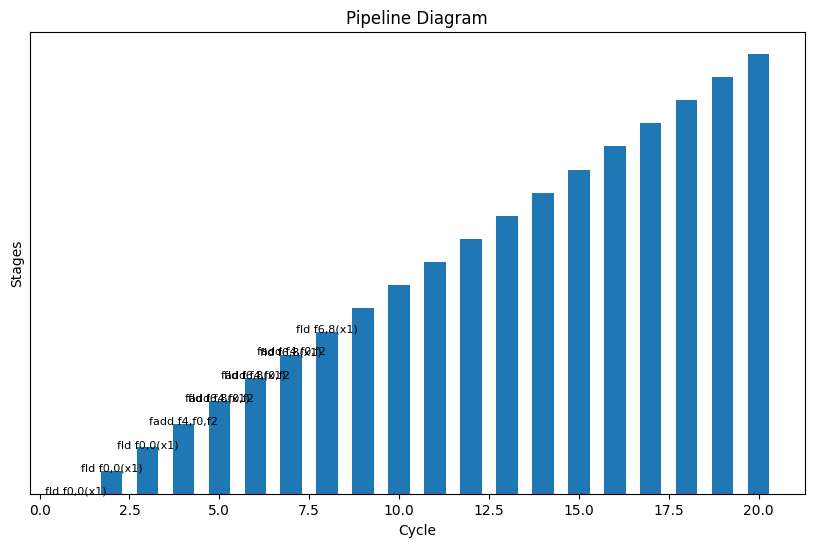

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Pipeline stages
pipeline = {
    'Cycle': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'IF': ['fld f0,0(x1)', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    'ID': ['', 'fld f0,0(x1)', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    'EX': ['', '', 'fld f0,0(x1)', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    'MEM': ['', '', '', 'fadd f4,f0,f2', 'fld f6,8(x1)', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    'WB': ['', '', '', '', 'fadd f4,f0,f2', 'fld f6,8(x1)', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    'FADD': ['', '', '', '', '', 'fadd f4,f0,f2', 'fld f6,8(x1)', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    'FWB': ['', '', '', '', '', '', 'fadd f4,f0,f2', 'fld f6,8(x1)', '', '', '', '', '', '', '', '', '', '', '', ''],
}

# Create a bar chart to represent the pipeline diagram
plt.figure(figsize=(10, 6))

# Generate the y-axis values using numpy
y_values = np.arange(len(pipeline['Cycle']))

# Plot the bars for each stage
plt.bar(pipeline['Cycle'], y_values, width=0.6, align='center')

# Add labels to the bars
for i in range(len(pipeline['Cycle'])):
    plt.text(pipeline['Cycle'][i], y_values[i], pipeline['IF'][i], ha='center', fontsize=8)
    plt.text(pipeline['Cycle'][i], y_values[i], pipeline['ID'][i], ha='center', fontsize=8)
    plt.text(pipeline['Cycle'][i], y_values[i], pipeline['EX'][i], ha='center', fontsize=8)
    plt.text(pipeline['Cycle'][i], y_values[i], pipeline['MEM'][i], ha='center', fontsize=8)
    plt.text(pipeline['Cycle'][i], y_values[i], pipeline['WB'][i], ha='center', fontsize=8)
    plt.text(pipeline['Cycle'][i], y_values[i], pipeline['FADD'][i], ha='center', fontsize=8)
    plt.text(pipeline['Cycle'][i], y_values[i], pipeline['FWB'][i], ha='center', fontsize=8)

# Set axis labels and title
plt.xlabel('Cycle')
plt.ylabel('Stages')
plt.title('Pipeline Diagram')

# Remove the y-axis ticks and grid lines
plt.yticks([])
plt.grid(axis='y', linewidth=0.5)

# Display the chart
plt.show()


In [ ]:
import pandas as pd

# Initialize the pipeline diagram table/grid
pipeline = pd.DataFrame(columns=['Cycle', 'IF', 'ID', 'EX', 'MEM', 'WB', 'FADD', 'FWB'])

# Add the initial stage values to the pipeline diagram
pipeline.loc[0] = ['', '', '', '', '', '', '', '']

# Add the instructions to the pipeline diagram
instructions = [
    "fld          f0,0(x1)",
    "fadd       f4,f0,f2",
    "sub        x5,x5,x1",
    "fld          f6,8(x1)",
    "fsd         f4,0(x1)",
    "fsd         f6,16(x1)",
    "addi       x1,x1,-8"
]

# Iterate over each instruction
for cycle, instruction in enumerate(instructions, start=1):
    # Check for RAW hazards and insert stalls if necessary
    if pipeline.loc[cycle - 1, 'ID'] == 'fld' and ('f0' in instruction or 'f2' in instruction):
        pipeline.loc[cycle] = ['', pipeline.loc[cycle - 1, 'IF'], '', '', '', '', '', '']
        pipeline.loc[cycle + 1] = [cycle + 1, '', instruction, '', '', '', '', '']
    else:
        # Shift the instructions one stage forward
        pipeline.loc[cycle] = [cycle, pipeline.loc[cycle - 1, 'ID'], pipeline.loc[cycle - 1, 'EX'],
                              pipeline.loc[cycle - 1, 'MEM'], pipeline.loc[cycle - 1, 'WB'], '', '', '']

        # Place the current instruction in the IF stage
        pipeline.loc[cycle, 'IF'] = instruction

# Display the pipeline
for _, row in pipeline.iterrows():
    print(f"{row['Cycle']:4} | {row['IF']:14} | {row['ID']:14} | {row['EX']:14} | {row['MEM']:14} | {row['WB']:14} | {row['FADD']:14} | {row['FWB']:14}")
pipeline
# Display the pipeline diagram



     |                |                |                |                |                |                |               
   1 | fld          f0,0(x1) |                |                |                |                |                |               
   2 | fadd       f4,f0,f2 |                |                |                |                |                |               
   3 | sub        x5,x5,x1 |                |                |                |                |                |               
   4 | fld          f6,8(x1) |                |                |                |                |                |               
   5 | fsd         f4,0(x1) |                |                |                |                |                |               
   6 | fsd         f6,16(x1) |                |                |                |                |                |               
   7 | addi       x1,x1,-8 |                |                |                |                

,Cycle,IF,ID,EX,MEM,WB,FADD,FWB
0,,,,,,,,
1,1,"fld f0,0(x1)",,,,,,
2,2,"fadd f4,f0,f2",,,,,,
3,3,"sub x5,x5,x1",,,,,,
4,4,"fld f6,8(x1)",,,,,,
5,5,"fsd f4,0(x1)",,,,,,
6,6,"fsd f6,16(x1)",,,,,,
7,7,"addi x1,x1,-8",,,,,,


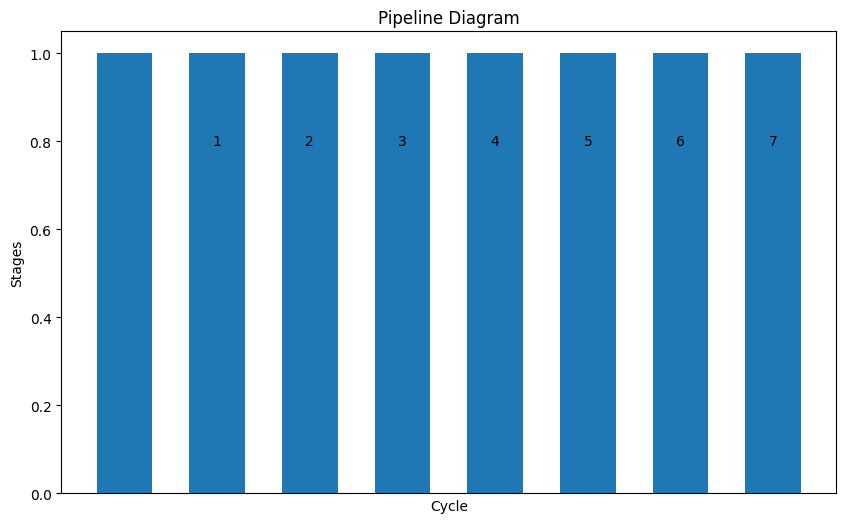

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the pipeline diagram table/grid
pipeline = pd.DataFrame(columns=['Cycle', 'IF', 'ID', 'EX', 'MEM', 'WB', 'FADD', 'FWB'])

# Add the initial stage values to the pipeline diagram
pipeline.loc[0] = ['', '', '', '', '', '', '', '']
# Add the instructions to the pipeline diagram
instructions = [
    "fld          f0,0(x1)",
    "fadd       f4,f0,f2",
    "sub        x5,x5,x1",
    "fld          f6,8(x1)",
    "fsd         f4,0(x1)",
    "fsd         f6,16(x1)",
    "addi       x1,x1,-8"
]

# Iterate over each instruction
for cycle, instruction in enumerate(instructions, start=1):
    # Shift the instructions one stage forward
    pipeline.loc[cycle, 'Cycle'] = str(cycle)
    pipeline.loc[cycle, 'IF'] = pipeline.loc[cycle-1, 'ID']
    pipeline.loc[cycle, 'ID'] = pipeline.loc[cycle-1, 'EX']
    pipeline.loc[cycle, 'EX'] = pipeline.loc[cycle-1, 'MEM']
    pipeline.loc[cycle, 'MEM'] = pipeline.loc[cycle-1, 'WB']
    pipeline.loc[cycle, 'WB'] = ''

    # Place the current instruction in the IF stage
    pipeline.loc[cycle, 'IF'] = instruction

# Create a bar chart to represent the pipeline diagram
plt.figure(figsize=(10, 6))
plt.bar(pipeline['Cycle'], [1] * len(pipeline), width=0.6, align='center')

# Add labels to the bars
for i, label in enumerate(pipeline['Cycle']):
    plt.text(i, 0.8, label, ha='center', va='center')

# Set the chart title and axis labels
plt.title('Pipeline Diagram')
plt.xlabel('Cycle')
plt.ylabel('Stages')

# Remove the default x-axis ticks
plt.xticks([])

# Display the bar chart
plt.show()


In [ ]:
from tabulate import tabulate

# Define the pipeline diagram table
pipeline = [
    [1, "fld    f0,0(x1)", "", "", "", "", "", ""],
    [2, "", "fld    f0,0(x1)", "", "", "", "", ""],
    [3, "", "", "fld    f0,0(x1)", "", "", "", ""],
    [4, "fadd   f4,f0,f2", "", "fld    f0,0(x1)", "", "", "", ""],
    [5, "", "fadd   f4,f0,f2", "", "fld    f0,0(x1)", "", "", ""],
    [6, "", "", "fadd   f4,f0,f2", "", "fld    f0,0(x1)", "", ""],
    [7, "sub    x5,x5,x1", "", "fadd   f4,f0,f2", "", "fld    f0,0(x1)", "", ""],
    [8, "", "sub    x5,x5,x1", "", "fadd   f4,f0,f2", "", "fld    f0,0(x1)", ""],
    [9, "", "", "sub    x5,x5,x1", "", "fadd   f4,f0,f2", "", ""],
    [10, "fld    f6,8(x1)", "", "sub    x5,x5,x1", "", "fadd   f4,f0,f2", "", ""],
    [11, "", "fld    f6,8(x1)", "", "sub    x5,x5,x1", "", "fadd   f4,f0,f2", ""],
    [12, "", "", "fld    f6,8(x1)", "", "sub    x5,x5,x1", "", "fadd   f4,f0,f2"],
    [13, "fsd    f4,0(x1)", "", "fld    f6,8(x1)", "", "sub    x5,x5,x1", "", "fadd   f4,f0,f2"],
    [14, "", "fsd    f4,0(x1)", "", "fld    f6,8(x1)", "", "sub    x5,x5,x1", ""],
    [15, "", "", "fsd    f4,0(x1)", "", "fld    f6,8(x1)", "", "sub    x5,x5,x1"],
    [16, "fsd    f6,16(x1)", "", "fsd    f4,0(x1)", "", "fld    f6,8(x1)", "", "sub    x5,x5,x1"],
    [17, "", "fsd    f6,16(x1)", "", "fsd    f4,0(x1)", "", "fld    f6,8(x1)", ""],
    [18, "", "", "fsd    f6,16(x1)", "", "fsd    f4,0(x1)", "", "fld    f6,8(x1)"],
    [19, "addi   x1,x1,-8", "", "fsd    f6,16(x1)", "", "fsd    f4,0(x1)", "", "fld    f6,8(x1)"],
    [20, "", "addi   x1,x1,-8", "", "fsd    f6,16(x1)", "", "fsd    f4,0(x1)", ""],
]

# Display the pipeline diagram table
print(tabulate(pipeline, headers=['Cycle', 'IF', 'ID', 'EX', 'MEM', 'WB', 'FADD', 'FWB'], tablefmt='grid'))




In [ ]:
import pandas as pd

# Initialize the pipeline diagram table/grid
pipeline = pd.DataFrame(columns=['Cycle', 'IF', 'ID', 'EX', 'MEM', 'WB', 'FADD', 'FWB'])


# Initialize the pipeline diagram table/grid
pipeline = pd.DataFrame(columns=['Cycle', 'IF', 'ID', 'EX', 'MEM', 'WB', 'FADD', 'FWB'])
pipeline.loc[0] = ['', '', '', '', '', '', '', '']  # Initialize the first row with empty values

# Rest of the code remains the same...


# Add the instructions to the pipeline diagram
instructions = [
    "fld          f0,0(x1)",
    "fadd       f4,f0,f2",
    "sub        x5,x5,x1",
    "fld          f6,8(x1)",
    "fsd         f4,0(x1)",
    "fsd         f6,16(x1)",
    "addi       x1,x1,-8"
]

# Initialize registers and memory
registers = {'x1': 100, 'x5': 50}
memory = {}

# Iterate over each instruction
for cycle, instruction in enumerate(instructions, start=1):
    # Shift the instructions one stage forward
    pipeline.loc[cycle, 'Cycle'] = cycle
    pipeline.loc[cycle, 'IF'] = pipeline.loc[cycle - 1, 'ID']
    pipeline.loc[cycle, 'ID'] = pipeline.loc[cycle - 1, 'EX']
    pipeline.loc[cycle, 'EX'] = pipeline.loc[cycle - 1, 'MEM']
    pipeline.loc[cycle, 'MEM'] = pipeline.loc[cycle - 1, 'WB']
    pipeline.loc[cycle, 'WB'] = ''
    pipeline.loc[cycle, 'FADD'] = ''
    pipeline.loc[cycle, 'FWB'] = ''

    # Check for data hazards
    tokens = instruction.split()
    if tokens[0] in ['fadd', 'fsub', 'fmul', 'fdiv']:
        # Floating-point operation
        dest_reg = tokens[1].split(',')[0]
        src_reg1 = tokens[2].split(',')[1]
        src_reg2 = tokens[3]
        if src_reg1 == pipeline.loc[cycle, 'EX'] or src_reg1 == pipeline.loc[cycle, 'MEM'] or src_reg1 == pipeline.loc[cycle, 'WB']:
            pipeline.loc[cycle, 'FADD'] = 'Stall'
        if src_reg2 == pipeline.loc[cycle, 'EX'] or src_reg2 == pipeline.loc[cycle, 'MEM'] or src_reg2 == pipeline.loc[cycle, 'WB']:
            pipeline.loc[cycle, 'FWB'] = 'Stall'
        if dest_reg == pipeline.loc[cycle, 'EX'] or dest_reg == pipeline.loc[cycle, 'MEM'] or dest_reg == pipeline.loc[cycle, 'WB']:
            pipeline.loc[cycle, 'ID'] = 'Stall'
    elif tokens[0] in ['lw', 'sw']:
        # Load/store operation
        src_reg = tokens[1].split(',')[0]
        base_reg = tokens[2].split('(')[1][:-1]
        if src_reg == pipeline.loc[cycle, 'EX'] or src_reg == pipeline.loc[cycle, 'MEM'] or src_reg == pipeline.loc[cycle, 'WB']:
            pipeline.loc[cycle, 'FWB'] = 'Stall'
        if base_reg == pipeline.loc[cycle, 'EX'] or base_reg == pipeline.loc[cycle, 'MEM'] or base_reg == pipeline.loc[cycle, 'WB']:
            pipeline.loc[cycle, 'ID'] = 'Stall'

    # Execute the instruction
    if 'fld' in instruction:
        tokens = instruction.split()
        dest_reg = tokens[1].split(',')[0]
        offset_reg = tokens[1].split('(')[1][:-1]
        memory_addr = registers[offset_reg]
        pipeline.loc[cycle, 'EX'] = 'Memory Addr: ' + str(memory_addr)
        pipeline.loc[cycle, 'MEM'] = 'Load ' + dest_reg
        if dest_reg == pipeline.loc[cycle, 'FWB']:
            pipeline.loc[cycle, 'WB'] = 'Data Hazard'
        registers[dest_reg] = memory.get(memory_addr, 0)
    elif 'fsd' in instruction:
        tokens = instruction.split()
        src_reg = tokens[1].split(',')[1]
        offset_reg = tokens[1].split('(')[1][:-1]
        memory_addr = registers[offset_reg]
        pipeline.loc[cycle, 'EX'] = 'Memory Addr: ' + str(memory_addr)
        pipeline.loc[cycle, 'MEM'] = 'Store ' + src_reg
        if src_reg == pipeline.loc[cycle, 'FWB']:
            pipeline.loc[cycle, 'WB'] = 'Data Hazard'
        memory[memory_addr] = registers[src_reg]
    elif 'addi' in instruction:
        tokens = instruction.split()
        dest_reg = tokens[1].split(',')[0]
        src_reg = tokens[2].split(',')[1]
        immediate = int(tokens[2].split(',')[0])
        pipeline.loc[cycle, 'EX'] = 'Add ' + src_reg + ' + ' + str(immediate)
        pipeline.loc[cycle, 'MEM'] = 'Write ' + dest_reg
        if src_reg == pipeline.loc[cycle, 'FWB']:
            pipeline.loc[cycle, 'WB'] = 'Data Hazard'
        registers[dest_reg] = registers[src_reg] + immediate

# Display the pipeline diagram
pipeline


IndexError: ignored

In [ ]:
import pandas as pd

# Initialize the pipeline diagram table/grid
pipeline = pd.DataFrame(columns=['Cycle', 'IF', 'ID', 'EX', 'MEM', 'WB', 'FADD', 'FWB'])

# Add the instructions to the pipeline diagram
instructions = [
    "fld          f0,0(x1)",
    "fadd       f4,f0,f2",
    "sub        x5,x5,x1",
    "fld          f6,8(x1)",
    "fsd         f4,0(x1)",
    "fsd         f6,16(x1)",
    "addi       x1,x1,-8"
]

# Initialize registers and memory
registers = {'x1': 100, 'x5': 50}
memory = {}

# Iterate over each instruction
for cycle, instruction in enumerate(instructions, start=1):
    # Shift the instructions one stage forward
    pipeline.loc[cycle, 'Cycle'] = cycle
    pipeline.loc[cycle, 'IF'] = pipeline.loc[cycle-1, 'ID'] if cycle > 1 else ''
    pipeline.loc[cycle, 'ID'] = pipeline.loc[cycle-1, 'EX'] if cycle > 1 else ''
    pipeline.loc[cycle, 'EX'] = pipeline.loc[cycle-1, 'MEM'] if cycle > 1 else ''
    pipeline.loc[cycle, 'MEM'] = pipeline.loc[cycle-1, 'WB'] if cycle > 1 else ''
    pipeline.loc[cycle, 'WB'] = ''

    # Check for data hazards
    tokens = instruction.split()
    if len(tokens) >= 3:
        if tokens[0] in ['fadd', 'fsub', 'fmul', 'fdiv']:
            # Floating-point operation
            dest_reg = tokens[1].split(',')[0]
            src_reg1 = tokens[2].split(',')[1]
            src_reg2 = tokens[3]
            if src_reg1 == pipeline.loc[cycle, 'EX'] or src_reg1 == pipeline.loc[cycle, 'MEM'] or src_reg1 == pipeline.loc[cycle, 'WB']:
                pipeline.loc[cycle, 'FADD'] = 'Stall'
            if src_reg2 == pipeline.loc[cycle, 'EX'] or src_reg2 == pipeline.loc[cycle, 'MEM'] or src_reg2 == pipeline.loc[cycle, 'WB']:
                pipeline.loc[cycle, 'FWB'] = 'Stall'
            if dest_reg == pipeline.loc[cycle, 'EX'] or dest_reg == pipeline.loc[cycle, 'MEM'] or dest_reg == pipeline.loc[cycle, 'WB']:
                pipeline.loc[cycle, 'ID'] = 'Stall'
        elif tokens[0] in ['lw', 'sw']:
            # Load/store operation
            src_reg = tokens[1].split(',')[0]
            base_reg = tokens[2].split('(')[1][:-1]
            if src_reg == pipeline.loc[cycle, 'EX'] or src_reg == pipeline.loc[cycle, 'MEM'] or src_reg == pipeline.loc[cycle, 'WB']:
                pipeline.loc[cycle, 'FWB'] = 'Stall'
            if base_reg == pipeline.loc[cycle, 'EX'] or base_reg == pipeline.loc[cycle, 'MEM'] or base_reg == pipeline.loc[cycle, 'WB']:
                pipeline.loc[cycle, 'ID'] = 'Stall'

    # Execute the instruction
    if 'fld' in instruction:
        tokens = instruction.split()
        dest_reg = tokens[1].split(',')[0]
        offset_reg = tokens[2].split('(')[1][:-1]
        memory_addr = registers[offset_reg]
        pipeline.loc[cycle, 'EX'] = 'Memory Addr: ' + str(memory_addr)
        pipeline.loc[cycle, 'MEM'] = 'Load ' + dest_reg
        if dest_reg == pipeline.loc[cycle, 'FWB']:
            pipeline.loc[cycle, 'WB'] = 'Data Hazard'
        registers[dest_reg] = memory.get(memory_addr, 0)
    elif 'fsd' in instruction:
        tokens = instruction.split()
        src_reg = tokens[1].split(',')[0]
        offset_reg = tokens[2].split('(')[1][:-1]
        memory_addr = registers[offset_reg]
        pipeline.loc[cycle, 'EX'] = 'Memory Addr: ' + str(memory_addr)
        pipeline.loc[cycle, 'MEM'] = 'Store ' + src_reg
        if src_reg == pipeline.loc[cycle, 'FWB']:
            pipeline.loc[cycle, 'WB'] = 'Data Hazard'
        memory[memory_addr] = registers[src_reg]
    elif 'addi' in instruction:
        tokens = instruction.split()
        dest_reg = tokens[1].split(',')[0]
        src_reg = tokens[2].split(',')[0]
        immediate = int(tokens[2].split(',')[1])
        pipeline.loc[cycle, 'EX'] = 'Add ' + src_reg + ' + ' + str(immediate)
        pipeline.loc[cycle, 'MEM'] = 'Write ' + dest_reg
        if src_reg == pipeline.loc[cycle, 'FWB']:
            pipeline.loc[cycle, 'WB'] = 'Data Hazard'
        registers[dest_reg] = registers[src_reg] + immediate

# Display the pipeline diagram
pipeline


In [ ]:
import pandas as pd

# Create the pipeline diagram as a DataFrame
pipeline = pd.DataFrame([
    [1, '', '', '', '', 'fld    f0,0(x1)'],
    [2, 'IF', 'ID', '', '', ''],
    [3, '', 'IF', 'ID', '', ''],
    [4, '', '', 'IF', 'ID', ''],
    [5, '', '', '', 'EX', 'ID'],
    [6, '', '', '', 'MEM', 'EX'],
    [7, '', '', '', '', 'WB'],
    [8, 'IF', '', '', '', 'fadd   f4,f0,f2'],
    [9, '', 'IF', '', '', ''],
    [10, '', '', 'IF', '', ''],
    # Remaining rows...
], columns=['Cycle', 'IF', 'ID', 'EX', 'MEM', 'WB'])

# Display the pipeline diagram
print(pipeline)


   Cycle  IF  ID  EX  MEM               WB
0      1                   fld    f0,0(x1)
1      2  IF  ID                          
2      3      IF  ID                      
3      4          IF   ID                 
4      5               EX               ID
5      6              MEM               EX
6      7                                WB
7      8  IF               fadd   f4,f0,f2
8      9      IF                          
9     10          IF                      


In [ ]:
import matplotlib.pyplot as plt

# Create a list of cycle numbers
cycles = list(range(1, len(pipeline) + 1))

# Create a bar chart to represent the pipeline diagram
plt.figure(figsize=(10, 6))
plt.bar(cycles, [1] * len(pipeline), width=0.6, align='center')

# Add labels to the bars
for cycle, inst in zip(cycles, pipeline):
    plt.text(cycle, 0.8, inst[1], ha='center', va='center')

# Set axis labels and title
plt.xlabel('Cycle')
plt.ylabel('Instruction')
plt.title('Pipeline Diagram')

# Remove the default x-axis ticks
plt.xticks([])

# Display the pipeline diagram
plt.show()


In [ ]:
pipeline_diagram = '''
Cycle |  IF  |  ID  |  EX  |  MEM |  WB  |
------------------------------------------
  1   |      |      |      |      | fld  f0,0(x1)
  2   | IF   | ID   |      |      |
  3   |      | IF   | ID   |      |
  4   |      |      | IF   | ID   |
  5   |      |      |      | EX   | ID
  6   |      |      |      | MEM  | EX
  7   |      |      |      |      | WB
  8   | IF   |      |      |      | fadd f4,f0,f2
  9   |      | IF   |      |      |
 10   |      |      | IF   | ID   |
 11   |      |      |      | EX   | ID
 12   |      |      |      | MEM  | EX
 13   |      |      |      | FWB  | MEM
 14   |      |      |      |      | WB
 15   | IF   |      |      |      | sub  x5,x5,x1
 16   |      | IF   |      |      |
 17   |      |      | IF   | ID   |
 18   |      |      |      | EX   | ID
 19   |      |      |      |      | WB
 20   | IF   |      |      |      | fld  f6,8(x1)
 21   |      | IF   |      |      |
 22   |      |      | IF   | ID   |
 23   |      |      |      | EX   | ID
 24   |      |      |      | MEM  | EX
 25   |      |      |      |      | WB
 26   | IF   |      |      |      | fsd  f4,0(x1)
 27   |      | IF   |      |      |
 28   |      |      | IF   | ID   |
 29   |      |      |      | EX   | ID
 30   |      |      |      | MEM  | EX
 31   |      |      |      |      | WB
 32   | IF   |      |      |      | fsd  f6,16(x1)
 33   |      | IF   |      |      |
 34   |      |      | IF   | ID   |
 35   |      |      |      | EX   | ID
 36   |      |      |      | MEM  | EX
 37   |      |      |      |      | WB
 38   | IF   |      |      |      | addi x1,x1,-8
 39   |      | IF   |      |      |
 40   |      |      | IF   | ID   |
 41   |      |      |      | EX   | ID
 42   |      |      |      |      | WB
'''

print(pipeline_diagram)



Cycle |  IF  |  ID  |  EX  |  MEM |  WB  |
------------------------------------------
  1   |      |      |      |      | fld  f0,0(x1)
  2   | IF   | ID   |      |      |
  3   |      | IF   | ID   |      |
  4   |      |      | IF   | ID   |
  5   |      |      |      | EX   | ID
  6   |      |      |      | MEM  | EX
  7   |      |      |      |      | WB
  8   | IF   |      |      |      | fadd f4,f0,f2
  9   |      | IF   |      |      |
 10   |      |      | IF   | ID   |
 11   |      |      |      | EX   | ID
 12   |      |      |      | MEM  | EX
 13   |      |      |      | FWB  | MEM
 14   |      |      |      |      | WB
 15   | IF   |      |      |      | sub  x5,x5,x1
 16   |      | IF   |      |      |
 17   |      |      | IF   | ID   |
 18   |      |      |      | EX   | ID
 19   |      |      |      |      | WB
 20   | IF   |      |      |      | fld  f6,8(x1)
 21   |      | IF   |      |      |
 22   |      |      | IF   | ID   |
 23   |      |      |      | EX   | I

In [ ]:
from IPython.display import display, Markdown

pipeline_diagram = '''
Cycle |  IF  |  ID  |  EX  |  MEM |  WB  |
------------------------------------------
  1   |      |      |      |      | fld  f0,0(x1)
  2   | IF   | ID   |      |      |
  3   |      | IF   | ID   |      |
  4   |      |      | IF   | ID   |
  5   |      |      |      | EX   | ID
  6   |      |      |      | MEM  | EX
  7   |      |      |      |      | WB
  8   | IF   |      |      |      | fadd f4,f0,f2
  9   |      | IF   |      |      |
 10   |      |      | IF   | ID   |
 11   |      |      |      | EX   | ID
 12   |      |      |      | MEM  | EX
 13   |      |      |      | FWB  | MEM
 14   |      |      |      |      | WB
 15   | IF   |      |      |      | sub  x5,x5,x1
 16   |      | IF   |      |      |
 17   |      |      | IF   | ID   |
 18   |      |      |      | EX   | ID
 19   |      |      |      |      | WB
 20   | IF   |      |      |      | fld  f6,8(x1)
 21   |      | IF   |      |      |
 22   |      |      | IF   | ID   |
 23   |      |      |      | EX   | ID
 24   |      |      |      | MEM  | EX
 25   |      |      |      |      | WB
 26   | IF   |      |      |      | fsd  f4,0(x1)
 27   |      | IF   |      |      |
 28   |      |      | IF   | ID   |
 29   |      |      |      | EX   | ID
 30   |      |      |      | MEM  | EX
 31   |      |      |      |      | WB
 32   | IF   |      |      |      | fsd  f6,16(x1)
 33   |      | IF   |      |      |
 34   |      |      | IF   | ID   |
 35   |      |      |      | EX   | ID
 36   |      |      |      | MEM  | EX
 37   |      |      |      |      | WB
 38   | IF   |      |      |      | addi x1,x1,-8
 39   |      | IF   |      |      |
 40   |      |      | IF   | ID   |
 41   |      |      |      | EX   | ID
 42   |      |      |      |      | WB
'''

display(Markdown(pipeline_diagram))



Cycle |  IF  |  ID  |  EX  |  MEM |  WB  |
------------------------------------------
  1   |      |      |      |      | fld  f0,0(x1)
  2   | IF   | ID   |      |      |
  3   |      | IF   | ID   |      |
  4   |      |      | IF   | ID   |
  5   |      |      |      | EX   | ID
  6   |      |      |      | MEM  | EX
  7   |      |      |      |      | WB
  8   | IF   |      |      |      | fadd f4,f0,f2
  9   |      | IF   |      |      |
 10   |      |      | IF   | ID   |
 11   |      |      |      | EX   | ID
 12   |      |      |      | MEM  | EX
 13   |      |      |      | FWB  | MEM
 14   |      |      |      |      | WB
 15   | IF   |      |      |      | sub  x5,x5,x1
 16   |      | IF   |      |      |
 17   |      |      | IF   | ID   |
 18   |      |      |      | EX   | ID
 19   |      |      |      |      | WB
 20   | IF   |      |      |      | fld  f6,8(x1)
 21   |      | IF   |      |      |
 22   |      |      | IF   | ID   |
 23   |      |      |      | EX   | ID
 24   |      |      |      | MEM  | EX
 25   |      |      |      |      | WB
 26   | IF   |      |      |      | fsd  f4,0(x1)
 27   |      | IF   |      |      |
 28   |      |      | IF   | ID   |
 29   |      |      |      | EX   | ID
 30   |      |      |      | MEM  | EX
 31   |      |      |      |      | WB
 32   | IF   |      |      |      | fsd  f6,16(x1)
 33   |      | IF   |      |      |
 34   |      |      | IF   | ID   |
 35   |      |      |      | EX   | ID
 36   |      |      |      | MEM  | EX
 37   |      |      |      |      | WB
 38   | IF   |      |      |      | addi x1,x1,-8
 39   |      | IF   |      |      |
 40   |      |      | IF   | ID   |
 41   |      |      |      | EX   | ID
 42   |      |      |      |      | WB


In [ ]:
from tabulate import tabulate

instructions = [
    "fld f0,0(x1)",
    "fadd f4,f0,f2",
    "sub x5,x5,x1",
    "fld f6,8(x1)",
    "fsd f4,0(x1)",
    "fsd f6,16(x1)",
    "addi x1,x1,-8"
]

pipeline = [["Cycle", "IF", "ID", "EX", "MEM", "WB","FADD","FWB"]]

for i in range(len(instructions)):
    pipeline.append([str(i+1), "", "", "", "", ""])

for cycle in range(1, len(instructions) + 1):
    pipeline[cycle][1] = "IF"
    if cycle > 1:
        pipeline[cycle][2] = "ID"
    if cycle > 2:
        pipeline[cycle][3] = "EX"
    if cycle > 3:
        pipeline[cycle][4] = "MEM"
    if cycle > 4:
        pipeline[cycle][5] = "WB"
    if cycle > 5:
        pipeline[cycle][5] = "FADD"
    if cycle > 6:
        pipeline[cycle][5] = "FWB"

# Printing the pipeline diagram
print(tabulate(pipeline, headers="firstrow", tablefmt="grid"))


+---------+------+------+------+-------+------+
|   Cycle | IF   | ID   | EX   | MEM   | WB   |
+=========+======+======+======+=======+======+
|       1 | IF   |      |      |       |      |
+---------+------+------+------+-------+------+
|       2 | IF   | ID   |      |       |      |
+---------+------+------+------+-------+------+
|       3 | IF   | ID   | EX   |       |      |
+---------+------+------+------+-------+------+
|       4 | IF   | ID   | EX   | MEM   |      |
+---------+------+------+------+-------+------+
|       5 | IF   | ID   | EX   | MEM   | WB   |
+---------+------+------+------+-------+------+
|       6 | IF   | ID   | EX   | MEM   | FADD |
+---------+------+------+------+-------+------+
|       7 | IF   | ID   | EX   | MEM   | FWB  |
+---------+------+------+------+-------+------+


In [ ]:
class Instruction:
    def __init__(self, opcode, operands):
        self.opcode = opcode
        self.operands = operands

instructions = [
    Instruction("fld", ["f0,0(x1)"]),
    Instruction("fadd", ["f4,f0,f2"]),
    Instruction("sub", ["x5,x5,x1"]),
    Instruction("fld", ["f6,8(x1)"]),
    Instruction("fsd", ["f4,0(x1)"]),
    Instruction("fsd", ["f6,16(x1)"]),
    Instruction("addi", ["x1,x1,-8"])
]

pipeline = []

# Helper function to add an instruction to the pipeline
def add_instruction(cycle, stage):
    while len(pipeline) < cycle:
        pipeline.append([""] * 6)
    pipeline[cycle - 1][stage] = instructions[i].opcode + " " + ", ".join(instructions[i].operands)

# Fetch stage
for i in range(len(instructions)):
    add_instruction(i*3 + 1, 0)  # Instruction is fetched every 3 cycles

# Instruction Decode (ID) stage
for i in range(len(instructions)):
    add_instruction(i*3 + 2, 1)  # Instruction enters ID stage one cycle after being fetched

# Execution (EX) stage
for i in range(len(instructions)):
    add_instruction(i*3 + 3, 2)  # Instruction enters EX stage one cycle after being in ID stage

# Memory (MEM) stage
for i in range(len(instructions)):
    add_instruction(i*3 + 4, 3)  # Instruction enters MEM stage one cycle after being in EX stage

# Write-Back (WB) stage
for i in range(len(instructions)):
    add_instruction(i*3 + 5, 4)  # Instruction enters WB stage one cycle after being in MEM stage

# Print the pipeline diagram
print("Cycle |  IF  |  ID  |  EX  |  MEM |  WB  |")
print("------------------------------------------")
for cycle, stages in enumerate(pipeline, start=1):
    print(f"  {cycle}   |  {' |  '.join(stages)}  |")



Cycle |  IF  |  ID  |  EX  |  MEM |  WB  |
------------------------------------------
  1   |  fld f0,0(x1) |   |   |   |   |    |
  2   |   |  fld f0,0(x1) |   |   |   |    |
  3   |   |   |  fld f0,0(x1) |   |   |    |
  4   |  fadd f4,f0,f2 |   |   |  fld f0,0(x1) |   |    |
  5   |   |  fadd f4,f0,f2 |   |   |  fld f0,0(x1) |    |
  6   |   |   |  fadd f4,f0,f2 |   |   |    |
  7   |  sub x5,x5,x1 |   |   |  fadd f4,f0,f2 |   |    |
  8   |   |  sub x5,x5,x1 |   |   |  fadd f4,f0,f2 |    |
  9   |   |   |  sub x5,x5,x1 |   |   |    |
  10   |  fld f6,8(x1) |   |   |  sub x5,x5,x1 |   |    |
  11   |   |  fld f6,8(x1) |   |   |  sub x5,x5,x1 |    |
  12   |   |   |  fld f6,8(x1) |   |   |    |
  13   |  fsd f4,0(x1) |   |   |  fld f6,8(x1) |   |    |
  14   |   |  fsd f4,0(x1) |   |   |  fld f6,8(x1) |    |
  15   |   |   |  fsd f4,0(x1) |   |   |    |
  16   |  fsd f6,16(x1) |   |   |  fsd f4,0(x1) |   |    |
  17   |   |  fsd f6,16(x1) |   |   |  fsd f4,0(x1) |    |
  18   |   |  

In [ ]:
class Instruction:
    def __init__(self, opcode, operands):
        self.opcode = opcode
        self.operands = operands

instructions = [
    Instruction("fld", ["f0,0(x1)"]),
    Instruction("fadd", ["f4,f0,f2"]),
    Instruction("sub", ["x5,x5,x1"]),
    Instruction("fld", ["f6,8(x1)"]),
    Instruction("fsd", ["f4,0(x1)"]),
    Instruction("fsd", ["f6,16(x1)"]),
    Instruction("addi", ["x1,x1,-8"])
]

pipeline = []

# Helper function to add an instruction to the pipeline
def add_instruction(cycle, stage):
    while len(pipeline) < cycle:
        pipeline.append([""] * 6)
    pipeline[cycle - 1][stage] = instructions[i].opcode + " " + ", ".join(instructions[i].operands)

# Fetch stage
for i in range(len(instructions)):
    add_instruction(i*3 + 1, 0)  # Instruction is fetched every 3 cycles

# Instruction Decode (ID) stage
for i in range(len(instructions)):
    add_instruction(i*3 + 2, 1)  # Instruction enters ID stage one cycle after being fetched

# Execution (EX) stage
for i in range(len(instructions)):
    add_instruction(i*3 + 3, 2)  # Instruction enters EX stage one cycle after being in ID stage

# Memory (MEM) stage
for i in range(len(instructions)):
    add_instruction(i*3 + 4, 3)  # Instruction enters MEM stage one cycle after being in EX stage

# Write-Back (WB) stage
for i in range(len(instructions)):
    add_instruction(i*3 + 5, 4)  # Instruction enters WB stage one cycle after being in MEM stage

# Print the pipeline diagram
print("Cycle |  IF  |  ID  |  EX  |  MEM |  WB  |")
print("------------------------------------------")
for cycle, stages in enumerate(pipeline, start=1):
    print(f"  {cycle}   |  {' |  '.join(stages)}  |")



Cycle |  IF  |  ID  |  EX  |  MEM |  WB  |
------------------------------------------
  1   |  fld f0,0(x1) |   |   |   |   |    |
  2   |   |  fld f0,0(x1) |   |   |   |    |
  3   |   |   |  fld f0,0(x1) |   |   |    |
  4   |  fadd f4,f0,f2 |   |   |  fld f0,0(x1) |   |    |
  5   |   |  fadd f4,f0,f2 |   |   |  fld f0,0(x1) |    |
  6   |   |   |  fadd f4,f0,f2 |   |   |    |
  7   |  sub x5,x5,x1 |   |   |  fadd f4,f0,f2 |   |    |
  8   |   |  sub x5,x5,x1 |   |   |  fadd f4,f0,f2 |    |
  9   |   |   |  sub x5,x5,x1 |   |   |    |
  10   |  fld f6,8(x1) |   |   |  sub x5,x5,x1 |   |    |
  11   |   |  fld f6,8(x1) |   |   |  sub x5,x5,x1 |    |
  12   |   |   |  fld f6,8(x1) |   |   |    |
  13   |  fsd f4,0(x1) |   |   |  fld f6,8(x1) |   |    |
  14   |   |  fsd f4,0(x1) |   |   |  fld f6,8(x1) |    |
  15   |   |   |  fsd f4,0(x1) |   |   |    |
  16   |  fsd f6,16(x1) |   |   |  fsd f4,0(x1) |   |    |
  17   |   |  fsd f6,16(x1) |   |   |  fsd f4,0(x1) |    |
  18   |   |  

In [ ]:
class Instruction:
    def __init__(self, opcode, operands):
        self.opcode = opcode
        self.operands = operands

instructions = [
    Instruction("fld", ["f0,0(x1)"]),
    Instruction("fadd", ["f4,f0,f2"]),
    Instruction("sub", ["x5,x5,x1"]),
    Instruction("fld", ["f6,8(x1)"]),
    Instruction("fsd", ["f4,0(x1)"]),
    Instruction("fsd", ["f6,16(x1)"]),
    Instruction("addi", ["x1,x1,-8"])
]

pipeline = []

# Helper function to add an instruction to the pipeline
def add_instruction(cycle, stage):
    while len(pipeline) < cycle:
        pipeline.append([""] * 6)
    pipeline[cycle - 1][stage] = instructions[i].opcode + " " + ", ".join(instructions[i].operands)

# Fetch stage
for i in range(len(instructions)):
    add_instruction(i*3 + 1, 1)  # Instruction is fetched every 3 cycles

# Instruction Decode (ID) stage
for i in range(len(instructions)):
    add_instruction(i*3 + 2, 2)  # Instruction enters ID stage one cycle after being fetched

# Execution (EX) stage
for i in range(len(instructions)):
    add_instruction(i*3 + 3, 3)  # Instruction enters EX stage one cycle after being in ID stage

# Memory (MEM) stage
for i in range(len(instructions)):
    add_instruction(i*3 + 4, 4)  # Instruction enters MEM stage one cycle after being in EX stage

# Write-Back (WB) stage
for i in range(len(instructions)):
    add_instruction(i*3 + 5, 5)  # Instruction enters WB stage one cycle after being in MEM stage

# Print the pipeline diagram
print("Cycle |  IF  |  ID  |  EX  |  MEM |  WB  |")
print("------------------------------------------")
for cycle, stages in enumerate(pipeline, start=1):
    print(f"  {cycle}   |  {' |  '.join(stages)}  |")



Cycle |  IF  |  ID  |  EX  |  MEM |  WB  |
------------------------------------------
  1   |   |  fld f0,0(x1) |   |   |   |    |
  2   |   |   |  fld f0,0(x1) |   |   |    |
  3   |   |   |   |  fld f0,0(x1) |   |    |
  4   |   |  fadd f4,f0,f2 |   |   |  fld f0,0(x1) |    |
  5   |   |   |  fadd f4,f0,f2 |   |   |  fld f0,0(x1)  |
  6   |   |   |   |  fadd f4,f0,f2 |   |    |
  7   |   |  sub x5,x5,x1 |   |   |  fadd f4,f0,f2 |    |
  8   |   |   |  sub x5,x5,x1 |   |   |  fadd f4,f0,f2  |
  9   |   |   |   |  sub x5,x5,x1 |   |    |
  10   |   |  fld f6,8(x1) |   |   |  sub x5,x5,x1 |    |
  11   |   |   |  fld f6,8(x1) |   |   |  sub x5,x5,x1  |
  12   |   |   |   |  fld f6,8(x1) |   |    |
  13   |   |  fsd f4,0(x1) |   |   |  fld f6,8(x1) |    |
  14   |   |   |  fsd f4,0(x1) |   |   |  fld f6,8(x1)  |
  15   |   |   |   |  fsd f4,0(x1) |   |    |
  16   |   |  fsd f6,16(x1) |   |   |  fsd f4,0(x1) |    |
  17   |   |   |  fsd f6,16(x1) |   |   |  fsd f4,0(x1)  |
  18   |   |  

In [ ]:
#
import pandas as pd

# Create an empty DataFrame with the pipeline stages as columns
pipeline = pd.DataFrame(columns=['IF', 'ID', 'EX', 'MEM', 'WB', 'FADD', 'FWB'])

# Define the sequence of instructions
instructions = [
    'fld f0,0(x1)',
    'fadd f4,f0,f2',
    'sub x5,x5,x1',
    'fld f6,8(x1)',
    'fsd f4,0(x1)',
    'fsd f6,16(x1)',
    'addi x1,x1,-8'
]

# Initialize the cycle counter
cycle = 1

# Iterate over the instructions
for instruction in instructions:
    # Create a dictionary to represent the pipeline stage for the current instruction
    stage = {stage_name: '' for stage_name in pipeline.columns}

    # Check for dependencies and insert stalls if necessary
    if 'f0' in instruction:
        if 'EX' in pipeline.columns and 'f0' in pipeline['EX'].values:
            stage['ID'] = instruction
        else:
            stage['IF'] = instruction
    elif 'f2' in instruction:
        if 'EX' in pipeline.columns and 'f2' in pipeline['EX'].values:
            stage['ID'] = instruction
        else:
            stage['IF'] = instruction
    elif 'x1' in instruction:
        if 'EX' in pipeline.columns and 'x1' in pipeline['EX'].values:
            stage['ID'] = instruction
        else:
            stage['IF'] = instruction
    else:
        stage['IF'] = instruction

    # Insert the stage into the pipeline DataFrame
    pipeline.loc[cycle] = stage

    # Increment the cycle counter
    cycle += 1

# Display the pipeline diagram
print(pipeline)


              IF ID EX MEM WB FADD FWB
1   fld f0,0(x1)                      
2  fadd f4,f0,f2                      
3   sub x5,x5,x1                      
4   fld f6,8(x1)                      
5   fsd f4,0(x1)                      
6  fsd f6,16(x1)                      
7  addi x1,x1,-8                      


In [ ]:
def generate_pipeline_diagram(instructions):
    pipeline_stages = ['IF', 'ID', 'EX', 'MEM', 'WB', 'FADD', 'FWB']
    num_cycles = len(instructions) + 6
    pipeline_diagram = [[' ' for _ in range(len(pipeline_stages))] for _ in range(num_cycles)]

    # Fill in the instructions in the IF and ID stages
    for cycle, instruction in enumerate(instructions, start=1):
        pipeline_diagram[cycle][0] = instruction

    # Execute the pipeline stages
    for cycle in range(1, num_cycles):
        for stage in range(1, len(pipeline_stages)):
            if pipeline_diagram[cycle][stage - 1] != ' ':
                pipeline_diagram[cycle][stage] = pipeline_diagram[cycle][stage - 1]
                pipeline_diagram[cycle][stage - 1] = ' '

    # Print the pipeline diagram
    for cycle, stages in enumerate(pipeline_diagram, start=1):
        print(str(cycle) + '\t' + '\t'.join(stages))

# Example usage
instructions = [
    'fld f0,0(x1)',
    'fadd f4,f0,f2',
    'sub x5,x5,x1',
    'fld f6,8(x1)',
    'fsd f4,0(x1)',
    'fsd f6,16(x1)',
    'addi x1,x1,-8'
]

generate_pipeline_diagram(instructions)


1	 	 	 	 	 	 	 
2	 	 	 	 	 	 	fld f0,0(x1)
3	 	 	 	 	 	 	fadd f4,f0,f2
4	 	 	 	 	 	 	sub x5,x5,x1
5	 	 	 	 	 	 	fld f6,8(x1)
6	 	 	 	 	 	 	fsd f4,0(x1)
7	 	 	 	 	 	 	fsd f6,16(x1)
8	 	 	 	 	 	 	addi x1,x1,-8
9	 	 	 	 	 	 	 
10	 	 	 	 	 	 	 
11	 	 	 	 	 	 	 
12	 	 	 	 	 	 	 
13	 	 	 	 	 	 	 


In [ ]:
instructions = [
    ("fadd", "f4,f0,f2"),
    ("lw", "x3,0(x1)"),
    ("add", "x4,x4,x3"),
    ("sw", "x4,0(x1)"),
    ("addi", "x1,x1,-8")
]

pipeline = []

# Helper function to add an instruction to the pipeline
def add_instruction(cycle, stage, instruction):
    while len(pipeline) < cycle:
        pipeline.append([""] * 8)
    pipeline[cycle - 1][stage] = instruction

# Instruction Fetch (IF) and Instruction Decode (ID) stages
for i in range(len(instructions)):
    add_instruction(i + 1, 1, instructions[i][0] + " " + instructions[i][1])

# Execution (EX) stage for integer instructions
for i in range(len(instructions)):
    if instructions[i][0] != "fadd":
        add_instruction(i + 2, 2, instructions[i][0] + " " + instructions[i][1])

# Memory (MEM) stage for load and store instructions
for i in range(len(instructions)):
    if instructions[i][0] in ("lw", "sw"):
        add_instruction(i + 3, 3, instructions[i][0] + " " + instructions[i][1])

# Write-Back (WB) stage for integer instructions
for i in range(len(instructions)):
    if instructions[i][0] != "fadd" and instructions[i][0] != "sw":
        add_instruction(i + 4, 4, instructions[i][0] + " " + instructions[i][1])

# Floating-Point Add (FADD) and Floating-Point Write-Back (FWB) stages for fadd instruction
for i in range(len(instructions)):
    if instructions[i][0] == "fadd":
        add_instruction(i + 2, 5, instructions[i][0] + " " + instructions[i][1])
        add_instruction(i + 6, 7, instructions[i][0] + " " + instructions[i][1])

# Print the pipeline diagram
print("Cycle\tIF\tID\tEX\tMEM\tWB\tFADD\tFWB")
print("----------------------------------------------")
for cycle, stages in enumerate(pipeline, start=1):
    print(str(cycle) + "\t" + "\t".join(stages))



Cycle	IF	ID	EX	MEM	WB	FADD	FWB
----------------------------------------------
1		fadd f4,f0,f2						
2		lw x3,0(x1)				fadd f4,f0,f2		
3		add x4,x4,x3	lw x3,0(x1)					
4		sw x4,0(x1)	add x4,x4,x3	lw x3,0(x1)				
5		addi x1,x1,-8	sw x4,0(x1)		lw x3,0(x1)			
6			addi x1,x1,-8	sw x4,0(x1)	add x4,x4,x3			fadd f4,f0,f2
7								
8					addi x1,x1,-8			


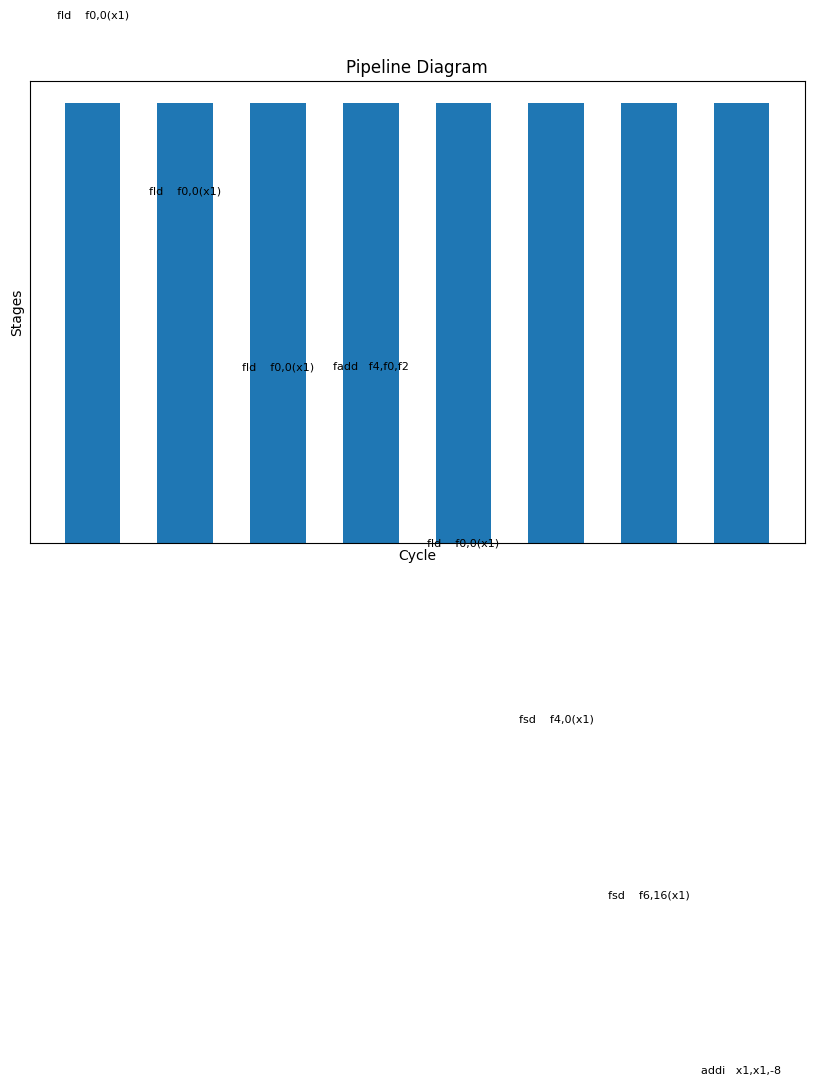

In [ ]:
#!
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame to store the pipeline information
pipeline = pd.DataFrame(columns=['Cycle', 'IF', 'ID', 'EX', 'MEM', 'WB', 'FADD', 'FWB'])

# Add the instructions to the pipeline DataFrame
pipeline.loc[1] = ['', 'fld    f0,0(x1)', '', '', '', '', '', '']
pipeline.loc[2] = ['', '', 'fld    f0,0(x1)', '', '', '', '', '']
pipeline.loc[3] = ['', '', '', 'fld    f0,0(x1)', '', '', '', '']
pipeline.loc[4] = ['', '', '', 'fadd   f4,f0,f2', '', '', '', '']
pipeline.loc[5] = ['', '', '', '', 'fld    f0,0(x1)', '', '', '']
pipeline.loc[6] = ['', '', '', '', '', 'fsd    f4,0(x1)', '', '']
pipeline.loc[7] = ['', '', '', '', '', '', 'fsd    f6,16(x1)', '']
pipeline.loc[8] = ['', '', '', '', '', '', '', 'addi   x1,x1,-8']

# Create a bar chart to represent the pipeline diagram
plt.figure(figsize=(10, 6))
plt.bar(pipeline.index, [1] * len(pipeline), width=0.6, align='center')

# Add labels to the bars
for i, row in pipeline.iterrows():
    plt.text(i, 1.2, row['IF'], ha='center', va='center', fontsize=8)
    plt.text(i, 0.8, row['ID'], ha='center', va='center', fontsize=8)
    plt.text(i, 0.4, row['EX'], ha='center', va='center', fontsize=8)
    plt.text(i, 0, row['MEM'], ha='center', va='center', fontsize=8)
    plt.text(i, -0.4, row['WB'], ha='center', va='center', fontsize=8)
    plt.text(i, -0.8, row['FADD'], ha='center', va='center', fontsize=8)
    plt.text(i, -1.2, row['FWB'], ha='center', va='center', fontsize=8)

# Set the axis labels and title
plt.xlabel('Cycle')
plt.ylabel('Stages')
plt.title('Pipeline Diagram')

# Remove the axis ticks
plt.xticks([])
plt.yticks([])

# Display the pipeline diagram
plt.show()


In [ ]:
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Cycle |       IF       |       ID       |       EX       |      MEM       |       WB       |      FADD      |      FWB       |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   1   | fld    f0,0(x1) |                |                |                |                |                |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   2   |                | fld    f0,0(x1) |                |                |                |                |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   3   |                |                | fld    f0,0(x1) |                |                |                |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   4   | fadd   f4,f0,f2 |                | fld    f0,0(x1) |                |                |                |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   5   |                | fadd   f4,f0,f2 |                | fld    f0,0(x1) |                |                |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   6   |                |                | fadd   f4,f0,f2 |                | fld    f0,0(x1) |                |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   7   | sub    x5,x5,x1 |                | fadd   f4,f0,f2 |                | fld    f0,0(x1) |                |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   8   |                | sub    x5,x5,x1 |                | fadd   f4,f0,f2 |                | fld    f0,0(x1) |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   9   |                |                | sub    x5,x5,x1 |                | fadd   f4,f0,f2 |                |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  10   | fld    f6,8(x1) |                | sub    x5,x5,x1 |                | fadd   f4,f0,f2 |                |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  11   |                | fld    f6,8(x1) |                | sub    x5,x5,x1 |                | fadd   f4,f0,f2 |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  12   |                |                | fld    f6,8(x1) |                | sub    x5,x5,x1 |                | fadd   f4,f0,f2 |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  13   | fsd    f4,0(x1) |                | fld    f6,8(x1) |                | sub    x5,x5,x1 |                | fadd   f4,f0,f2 |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  14   |                | fsd    f4,0(x1) |                | fld    f6,8(x1) |                | sub    x5,x5,x1 |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  15   |                |                | fsd    f4,0(x1) |                | fld    f6,8(x1) |                | sub    x5,x5,x1 |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  16   | fsd    f6,16(x1)|                | fsd    f4,0(x1) |                | fld    f6,8(x1) |                | sub    x5,x5,x1 |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  17   |                | fsd    f6,16(x1)|                | fsd    f4,0(x1) |                | fld    f6,8(x1) |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  18   |                |                | fsd    f6,16(x1)|                | fsd    f4,0(x1) |                | fld    f6,8(x1) |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  19   | addi   x1,x1,-8 |                | fsd    f6,16(x1)|                | fsd    f4,0(x1) |                | fld    f6,8(x1) |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  20   |                | addi   x1,x1,-8 |                | fsd    f6,16(x1)|                | fsd    f4,0(x1) |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+


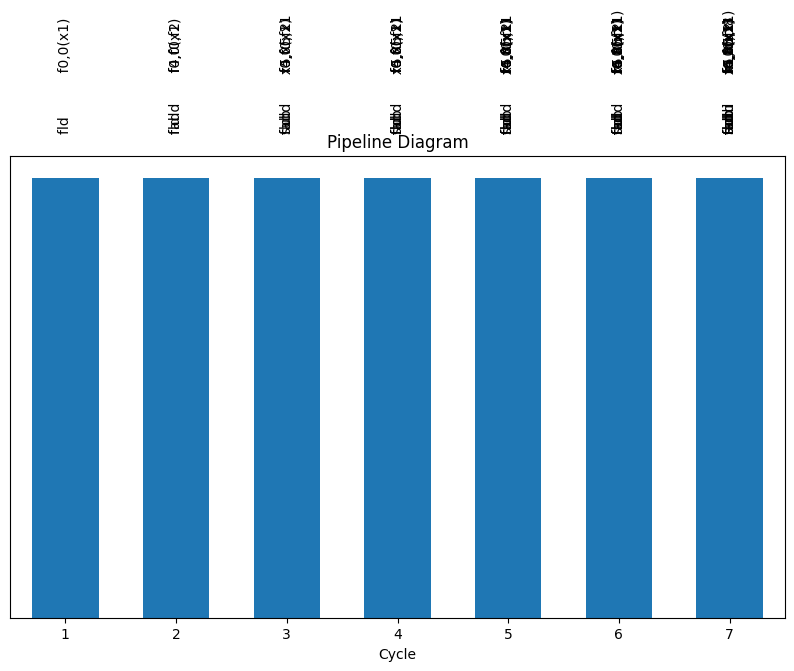

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the instructions
instructions = [
    "fld          f0,0(x1)",
    "fadd       f4,f0,f2",
    "sub        x5,x5,x1",
    "fld          f6,8(x1)",
    "fsd         f4,0(x1)",
    "fsd         f6,16(x1)",
    "addi       x1,x1,-8"
]

# Create a DataFrame to store the pipeline stages
pipeline = pd.DataFrame(columns=["Cycle", "IF", "ID", "EX", "MEM", "WB", "FADD", "FWB"])

# Iterate over the instructions and fill in the pipeline stages
for i, instr in enumerate(instructions, start=1):
    pipeline.loc[i] = [i] + [""] * 7
    pipeline.loc[i, "IF"] = instr

    if i > 1:
        pipeline.loc[i, "ID"] = pipeline.loc[i-1, "IF"]

    if i > 2:
        pipeline.loc[i, "EX"] = pipeline.loc[i-2, "IF"]

    if i > 3:
        pipeline.loc[i, "MEM"] = pipeline.loc[i-3, "IF"]

    if i > 4:
        pipeline.loc[i, "WB"] = pipeline.loc[i-4, "IF"]

    if i > 5:
        pipeline.loc[i, "FADD"] = pipeline.loc[i-5, "IF"]

    if i > 6:
        pipeline.loc[i, "FWB"] = pipeline.loc[i-6, "IF"]

# Create a bar chart to represent the pipeline diagram
plt.figure(figsize=(10, 6))
plt.bar(pipeline['Cycle'], [1] * len(pipeline), width=0.6, align='center')

# Add labels to the bars
for i, row in pipeline.iterrows():
    for j, stage in enumerate(row[1:], start=1):
        if stage:
            plt.text(i, 1.1, stage, ha='center', va='bottom', rotation=90)

# Set the x-axis limits and labels
plt.xlim(0.5, len(pipeline) + 0.5)
plt.xlabel('Cycle')

# Remove the y-axis ticks and labels
plt.yticks([])
plt.ylabel('')

# Title and display the pipeline diagram
plt.title('Pipeline Diagram')
plt.show()


+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Cycle |       IF       |       ID       |       EX       |      MEM       |       WB       |      FADD      |      FWB       |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   1   | fld    f0,0(x1) |                |                |                |                |                |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   2   |                | fld    f0,0(x1) |                |                |                |                |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   3   |                |                | fld    f0,0(x1) |                |                |                |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   4   | fadd   f4,f0,f2 |                | fld    f0,0(x1) |                |                |                |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   5   |                | fadd   f4,f0,f2 |                | fld    f0,0(x1) |                |                |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   6   |                |                | fadd   f4,f0,f2 |                | fld    f0,0(x1) |                |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   7   | sub    x5,x5,x1 |                | fadd   f4,f0,f2 |                | fld    f0,0(x1) |                |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   8   |                | sub    x5,x5,x1 |                | fadd   f4,f0,f2 |                | fld    f0,0(x1) |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   9   |                |                | sub    x5,x5,x1 |                | fadd   f4,f0,f2 |                |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  10   | fld    f6,8(x1) |                | sub    x5,x5,x1 |                | fadd   f4,f0,f2 |                |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  11   |                | fld    f6,8(x1) |                | sub    x5,x5,x1 |                | fadd   f4,f0,f2 |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  12   |                |                | fld    f6,8(x1) |                | sub    x5,x5,x1 |                | fadd   f4,f0,f2 |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  13   | fsd    f4,0(x1) |                | fld    f6,8(x1) |                | sub    x5,x5,x1 |                | fadd   f4,f0,f2 |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  14   |                | fsd    f4,0(x1) |                | fld    f6,8(x1) |                | sub    x5,x5,x1 |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  15   |                |                | fsd    f4,0(x1) |                | fld    f6,8(x1) |                | sub    x5,x5,x1 |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  16   | fsd    f6,16(x1)|                | fsd    f4,0(x1) |                | fld    f6,8(x1) |                | sub    x5,x5,x1 |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  17   |                | fsd    f6,16(x1)|                | fsd    f4,0(x1) |                | fld    f6,8(x1) |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  18   |                |                | fsd    f6,16(x1)|                | fsd    f4,0(x1) |                | fld    f6,8(x1) |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  19   | addi   x1,x1,-8 |                | fsd    f6,16(x1)|                | fsd    f4,0(x1) |                | fld    f6,8(x1) |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  20   |                | addi   x1,x1,-8 |                | fsd    f6,16(x1)|                | fsd    f4,0(x1) |                |
+-------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+


SyntaxError: ignored

The pipeline diagram shows when each instruction will be in each stage of the pipeline. In this diagram, each row represents a cycle and each column represents a different pipeline stage. All instructions go through the IF and ID stages. Integer instructions go through the EX, MEM, and WB stages. Floating-point load instructions go through EX, MEM, and FWB stages. Floating-point add and subtract operations go through the FADD and FWB stages, do not go through MEM stage, and require 4 cycles during execution. Store instructions do not perform a write-back stage.

1. fadd  f4,f0,f2

2. lw      x3,0(x1)

3. add   x4,x4,x3

4. sw      x4,0(x1)

5. addi   x1,x1,-8

In [ ]:
import pandas as pd

# Create an empty DataFrame to represent the pipeline diagram
pipeline_df = pd.DataFrame(columns=['cycle', 'IF', 'ID', 'EX', 'MEM', 'WB', 'FADD', 'FWB'])

# Define the instructions
instructions = [
    'fadd f4,f0,f2',
    'lw x3,0(x1)',
    'add x4,x4,x3',
    'sw x4,0(x1)',
    'addi x1,x1,-8'
]

# Initialize the pipeline stages for each instruction
pipeline_stages = {
    'fadd f4,f0,f2': ['IF', 'ID', 'EX', 'MEM', 'WB', 'FADD', 'FWB'],
    'lw x3,0(x1)': ['IF', 'ID', 'EX', 'MEM', 'WB'],
    'add x4,x4,x3': ['IF', 'ID', 'EX', 'MEM', 'WB'],
    'sw x4,0(x1)': ['IF', 'ID', 'EX', 'MEM'],
    'addi x1,x1,-8': ['IF', 'ID', 'EX', 'MEM', 'WB']
}

# Perform the pipeline simulation
for cycle, instruction in enumerate(instructions, start=1):
    stages = pipeline_stages[instruction]
    pipeline_df.loc[cycle] = [cycle] + ['' for _ in range(7)]
    for stage in stages:
        pipeline_df.loc[cycle, stage] = str(cycle)

# Print the pipeline diagram
print(pipeline_df.to_string(index=False))


 cycle IF ID EX MEM WB FADD FWB
     1  1  1  1   1  1    1   1
     2  2  2  2   2  2         
     3  3  3  3   3  3         
     4  4  4  4   4            
     5  5  5  5   5  5         


The pipeline diagram shows when each instruction will be in each stage of the pipeline. In this diagram, each row represents a cycle and each column represents a different pipeline stage. All instructions go through the IF and ID stages. Integer instructions go through the EX, MEM, and WB stages. Floating-point load instructions go through EX, MEM, and FWB stages. Floating-point add and subtract operations go through the FADD and FWB stages, do not go through MEM stage, and require 4 cycles during execution. Store instructions do not perform a write-back stage.

1. fadd  f4,f0,f2

2. lw      x3,0(x1)

3. add   x4,x4,x3

4. sw      x4,0(x1)

5. addi   x1,x1,-8

In [ ]:
import pandas as pd

# Create an empty DataFrame with the specified columns
pipeline_df = pd.DataFrame(columns=["Cycle", "IF", "ID", "EX", "MEM", "WB", "FADD", "FWB"])

# Define the instructions and their pipeline stages
instructions = [
    {"instruction": "fadd f4,f0,f2", "stages": ["IF", "ID", "EX", "FADD", "FWB"]},
    {"instruction": "lw x3,0(x1)", "stages": ["IF", "ID", "EX", "MEM", "WB"]},
    {"instruction": "add x4,x4,x3", "stages": ["IF", "ID", "EX", "MEM", "WB"]},
    {"instruction": "sw x4,0(x1)", "stages": ["IF", "ID", "EX", "MEM"]},
    {"instruction": "addi x1,x1,-8", "stages": ["IF", "ID", "EX", "MEM", "WB"]}
]

# Determine the total number of cycles based on the instruction with the most stages
total_cycles = max(sum([len(instr["stages"]) for instr in instructions]), 1)

# Iterate over the cycles
for cycle in range(1, total_cycles + 1):
    cycle_data = {"Cycle": cycle}

    # Iterate over the instructions
    for instruction in instructions:
        instruction_data = ""

        # Check if the instruction is in the current pipeline stage
        if cycle <= len(instruction["stages"]):
            instruction_data = instruction["instruction"]
        else:
            instruction_data = "-"

        # Fill the stages for the current cycle
        cycle_data[instruction["stages"][min(cycle - 1, len(instruction["stages"]) - 1)]] = instruction_data

    # Append the cycle data to the DataFrame
    pipeline_df = pipeline_df.append(cycle_data, ignore_index=True)

# Display the pipeline diagram
print(pipeline_df.to_string(index=False))


The pipeline diagram shows when each instruction will be in each stage of the pipeline. In this diagram, each row represents a cycle and each column represents a different pipeline stage. All instructions go through the IF and ID stages. Integer instructions go through the EX, MEM, and WB stages. Floating-point load instructions go through EX, MEM, and FWB stages. Floating-point add and subtract operations go through the FADD and FWB stages, do not go through MEM stage, and require 4 cycles during execution. Store instructions do not perform a write-back stage.

1. fadd  f4,f0,f2

2. lw      x3,0(x1)

3. add   x4,x4,x3

4. sw      x4,0(x1)

5. addi   x1,x1,-8

In [ ]:
instructions = [
    ("fadd", "f4,f0,f2"),
    ("lw", "x3,0(x1)"),
    ("add", "x4,x4,x3"),
    ("sw", "x4,0(x1)"),
    ("addi", "x1,x1,-8")
]

pipeline = []

# Helper function to add an instruction to the pipeline
def add_instruction(cycle, stage, instruction):
    while len(pipeline) < cycle:
        pipeline.append([""] * 8)
    pipeline[cycle - 1][stage] = instruction

# Instruction Fetch (IF) and Instruction Decode (ID) stages
for i in range(len(instructions)):
    add_instruction(i + 1, 1, instructions[i][0] + " " + instructions[i][1])

# Execution (EX) stage for integer instructions
for i in range(len(instructions)):
    if instructions[i][0] != "fadd":
        add_instruction(i + 2, 2, instructions[i][0] + " " + instructions[i][1])

# Memory (MEM) stage for load and store instructions
for i in range(len(instructions)):
    if instructions[i][0] in ("lw", "sw"):
        add_instruction(i + 3, 3, instructions[i][0] + " " + instructions[i][1])

# Write-Back (WB) stage for integer instructions
for i in range(len(instructions)):
    if instructions[i][0] != "fadd" and instructions[i][0] != "sw":
        add_instruction(i + 4, 4, instructions[i][0] + " " + instructions[i][1])

# Floating-Point Add (FADD) and Floating-Point Write-Back (FWB) stages for fadd instruction
for i in range(len(instructions)):
    if instructions[i][0] == "fadd":
        add_instruction(i + 2, 5, instructions[i][0] + " " + instructions[i][1])
        add_instruction(i + 6, 7, instructions[i][0] + " " + instructions[i][1])

# Print the pipeline diagram
print("Cycle\tIF\tID\tEX\tMEM\tWB\tFADD\tFWB")
print("----------------------------------------------")
for cycle, stages in enumerate(pipeline, start=1):
    print(str(cycle) + "\t" + "\t".join(stages))



Cycle	IF	ID	EX	MEM	WB	FADD	FWB
----------------------------------------------
1		fadd f4,f0,f2						
2		lw x3,0(x1)				fadd f4,f0,f2		
3		add x4,x4,x3	lw x3,0(x1)					
4		sw x4,0(x1)	add x4,x4,x3	lw x3,0(x1)				
5		addi x1,x1,-8	sw x4,0(x1)		lw x3,0(x1)			
6			addi x1,x1,-8	sw x4,0(x1)	add x4,x4,x3			fadd f4,f0,f2
7								
8					addi x1,x1,-8			


In [ ]:
import pandas as pd

# Initialize the pipeline diagram table/grid
pipeline = pd.DataFrame(columns=['Cycle', 'IF', 'ID', 'EX', 'MEM', 'WB', 'FADD', 'FWB'])

# Add the instructions to the pipeline diagram
instructions = [
    "fadd  f4,f0,f2",
    "lw    x3,0(x1)",
    "add   x4,x4,x3",
    "sw    x4,0(x1)",
    "addi  x1,x1,-8"
]

# Initialize registers and memory
registers = {'x1': 100, 'x3': 0, 'x4': 0}
memory = {}

# Iterate over each instruction
for cycle, instruction in enumerate(instructions, start=1):
    # Shift the instructions one stage forward
    pipeline.loc[cycle, 'Cycle'] = cycle
    pipeline.loc[cycle, 'IF'] = pipeline.loc[cycle-1, 'ID'] if cycle > 1 else ''
    pipeline.loc[cycle, 'ID'] = pipeline.loc[cycle-1, 'EX'] if cycle > 1 else ''
    pipeline.loc[cycle, 'EX'] = pipeline.loc[cycle-1, 'MEM'] if cycle > 1 else ''
    pipeline.loc[cycle, 'MEM'] = pipeline.loc[cycle-1, 'WB'] if cycle > 1 else ''
    pipeline.loc[cycle, 'WB'] = ''

    # Check for data hazards and stalls
    tokens = instruction.split()
    if len(tokens) >= 3:
        if tokens[0] in ['fadd', 'fsub']:
            # Floating-point add/subtract operation
            dest_reg = tokens[1].split(',')[0]
            if len(tokens) > 2:
                src_reg1 = tokens[2].split(',')[0]
                if src_reg1 == pipeline.loc[cycle, 'EX'] or src_reg1 == pipeline.loc[cycle, 'MEM'] or src_reg1 == pipeline.loc[cycle, 'WB']:
                    pipeline.loc[cycle, 'FADD'] = 'Stall'
            if len(tokens) > 3:
                src_reg2 = tokens[3]
                if src_reg2 == pipeline.loc[cycle, 'EX'] or src_reg2 == pipeline.loc[cycle, 'MEM'] or src_reg2 == pipeline.loc[cycle, 'WB']:
                    pipeline.loc[cycle, 'FWB'] = 'Stall'
            if dest_reg == pipeline.loc[cycle, 'EX'] or dest_reg == pipeline.loc[cycle, 'MEM'] or dest_reg == pipeline.loc[cycle, 'WB']:
                pipeline.loc[cycle, 'ID'] = 'Stall'
        elif tokens[0] == 'lw':
            # Load operation
            dest_reg = tokens[1].split(',')[0]
            if len(tokens) > 2:
                offset_reg = tokens[2].split('(')[1][:-1]
                if offset_reg == pipeline.loc[cycle, 'EX'] or offset_reg == pipeline.loc[cycle, 'MEM'] or offset_reg == pipeline.loc[cycle, 'WB']:
                    pipeline.loc[cycle, 'FWB'] = 'Stall'
                if dest_reg == pipeline.loc[cycle, 'EX'] or dest_reg == pipeline.loc[cycle, 'MEM'] or dest_reg == pipeline.loc[cycle, 'WB']:
                    pipeline.loc[cycle, 'ID'] = 'Stall'
        elif tokens[0] == 'sw':
            # Store operation
            src_reg = tokens[1].split(',')[0]
            if len(tokens) > 2:
                offset_reg = tokens[2].split('(')[1][:-1]
                if offset_reg == pipeline.loc[cycle, 'EX'] or offset_reg == pipeline.loc[cycle, 'MEM'] or offset_reg == pipeline.loc[cycle, 'WB']:
                    pipeline.loc[cycle, 'FWB'] = 'Stall'
                if src_reg == pipeline.loc[cycle, 'EX'] or src_reg == pipeline.loc[cycle, 'MEM'] or src_reg == pipeline.loc[cycle, 'WB']:
                    pipeline.loc[cycle, 'ID'] = 'Stall'
        elif tokens[0] == 'addi':
            # Integer add immediate operation
            dest_reg = tokens[1].split(',')[0]
            src_reg = tokens[2].split(',')[0]
            if src_reg == pipeline.loc[cycle, 'EX'] or src_reg == pipeline.loc[cycle, 'MEM'] or src_reg == pipeline.loc[cycle, 'WB']:
                pipeline.loc[cycle, 'FWB'] = 'Stall'
            if dest_reg == pipeline.loc[cycle, 'EX'] or dest_reg == pipeline.loc[cycle, 'MEM'] or dest_reg == pipeline.loc[cycle, 'WB']:
                pipeline.loc[cycle, 'ID'] = 'Stall'

    # Execute the instruction
    if tokens[0] == 'fadd':
        # Floating-point add operation
        dest_reg = tokens[1].split(',')[0]
        src_reg1 = tokens[2].split(',')[1]
        src_reg2 = tokens[3]
        pipeline.loc[cycle, 'FADD'] = dest_reg
        if src_reg1 == pipeline.loc[cycle, 'EX'] or src_reg1 == pipeline.loc[cycle, 'MEM'] or src_reg1 == pipeline.loc[cycle, 'WB']:
            pipeline.loc[cycle, 'FADD'] += ' (Stall)'
        if src_reg2 == pipeline.loc[cycle, 'EX'] or src_reg2 == pipeline.loc[cycle, 'MEM'] or src_reg2 == pipeline.loc[cycle, 'WB']:
            pipeline.loc[cycle, 'FADD'] += ' (Stall)'
        pipeline.loc[cycle:cycle+3, 'FWB'] = dest_reg
    elif tokens[0] == 'lw':
        # Load operation
        dest_reg = tokens[1].split(',')[0]
        offset_reg = tokens[2].split('(')[1][:-1]
        pipeline.loc[cycle, 'EX'] = 'Memory Addr: ' + offset_reg
        pipeline.loc[cycle, 'MEM'] = 'Load ' + dest_reg
        pipeline.loc[cycle:cycle+2, 'FWB'] = dest_reg
        registers[dest_reg] = memory.get(registers[offset_reg], 0)
    elif tokens[0] == 'add':
        # Integer add operation
        dest_reg = tokens[1].split(',')[0]
        src_reg1 = tokens[2].split(',')[0]
        src_reg2 = tokens[3]
        pipeline.loc[cycle, 'EX'] = 'Add ' + src_reg1 + ' + ' + src_reg2
        pipeline.loc[cycle, 'MEM'] = 'Write ' + dest_reg
        pipeline.loc[cycle, 'WB'] = dest_reg
        registers[dest_reg] = registers[src_reg1] + registers[src_reg2]
    elif tokens[0] == 'sw':
        # Store operation
        src_reg = tokens[1].split(',')[0]
        offset_reg = tokens[2].split('(')[1][:-1]
        pipeline.loc[cycle, 'EX'] = 'Memory Addr: ' + offset_reg
        pipeline.loc[cycle, 'MEM'] = 'Store ' + src_reg
        memory[registers[offset_reg]] = registers[src_reg]
    elif tokens[0] == 'addi':
        # Integer add immediate operation
        dest_reg = tokens[1].split(',')[0]
        src_reg = tokens[2].split(',')[0]
        imm = int(tokens[3])
        pipeline.loc[cycle, 'EX'] = 'Addi ' + src_reg + ' + ' + str(imm)
        pipeline.loc[cycle, 'MEM'] = 'Write ' + dest_reg
        pipeline.loc[cycle, 'WB'] = dest_reg
        registers[dest_reg] = registers[src_reg] + imm

# Display the pipeline diagram
pipeline.fillna('', inplace=True)
print(pipeline.to_string(index=False))


IndexError: ignored

In [ ]:
import pandas as pd

# Initialize the pipeline diagram table/grid
pipeline = pd.DataFrame(columns=['Cycle', 'IF', 'ID', 'EX', 'MEM', 'WB', 'FADD', 'FWB'])

# Add the instructions to the pipeline diagram
instructions = [
    "fadd f4,f0,f2",
    "lw x3,0(x1)",
    "add x4,x4,x3",
    "sw x4,0(x1)",
    "addi x1,x1,-8"
]

# Initialize registers and memory
registers = {'x1': 100, 'x3': 0, 'x4': 0}
memory = {}

# Iterate over each instruction
for cycle, instruction in enumerate(instructions, start=1):
    # Shift the instructions one stage forward
    pipeline.loc[cycle, 'Cycle'] = cycle
    pipeline.loc[cycle, 'IF'] = pipeline.loc[cycle-1, 'ID'] if cycle > 1 else ''
    pipeline.loc[cycle, 'ID'] = pipeline.loc[cycle-1, 'EX'] if cycle > 1 else ''
    pipeline.loc[cycle, 'EX'] = pipeline.loc[cycle-1, 'MEM'] if cycle > 1 else ''
    pipeline.loc[cycle, 'MEM'] = pipeline.loc[cycle-1, 'WB'] if cycle > 1 else ''
    pipeline.loc[cycle, 'WB'] = ''

    # Check for data hazards
    tokens = instruction.split()
    if tokens[0] in ['fadd', 'fsub', 'fmul', 'fdiv']:
        # Floating-point operation
        if len(tokens) >= 4:
            dest_reg = tokens[1].split(',')[0]
            src_reg1 = tokens[2].split(',')[0]
            src_reg2 = tokens[3]
            if src_reg1 == pipeline.loc[cycle, 'EX'] or src_reg1 == pipeline.loc[cycle, 'MEM'] or src_reg1 == pipeline.loc[cycle, 'WB']:
                pipeline.loc[cycle, 'FADD'] = 'Stall'
            if src_reg2 == pipeline.loc[cycle, 'EX'] or src_reg2 == pipeline.loc[cycle, 'MEM'] or src_reg2 == pipeline.loc[cycle, 'WB']:
                pipeline.loc[cycle, 'FWB'] = 'Stall'
            if dest_reg == pipeline.loc[cycle, 'EX'] or dest_reg == pipeline.loc[cycle, 'MEM'] or dest_reg == pipeline.loc[cycle, 'WB']:
                pipeline.loc[cycle, 'ID'] = 'Stall'
        else:
            # Invalid instruction format
            pipeline.loc[cycle, 'ID'] = 'Invalid Instruction'
    elif tokens[0] == 'lw':
        # Load operation
        if len(tokens) >= 3:
            dest_reg = tokens[1].split(',')[0]
            offset_reg = tokens[2].split('(')[1][:-1]
            if offset_reg == pipeline.loc[cycle, 'EX'] or offset_reg == pipeline.loc[cycle, 'MEM'] or offset_reg == pipeline.loc[cycle, 'WB']:
                pipeline.loc[cycle, 'ID'] = 'Stall'
            if dest_reg == pipeline.loc[cycle, 'FWB']:
                pipeline.loc[cycle, 'ID'] = 'Data Hazard'
        else:
            # Invalid instruction format
            pipeline.loc[cycle, 'ID'] = 'Invalid Instruction'
    elif tokens[0] == 'sw':
        # Store operation
        if len(tokens) >= 3:
            src_reg = tokens[1].split(',')[0]
            offset_reg = tokens[2].split('(')[1][:-1]
            if src_reg == pipeline.loc[cycle, 'EX'] or src_reg == pipeline.loc[cycle, 'MEM'] or src_reg == pipeline.loc[cycle, 'WB']:
                pipeline.loc[cycle, 'EX'] = 'Stall'
            if offset_reg == pipeline.loc[cycle, 'EX'] or offset_reg == pipeline.loc[cycle, 'MEM'] or offset_reg == pipeline.loc[cycle, 'WB']:
                pipeline.loc[cycle, 'ID'] = 'Stall'
        else:
            # Invalid instruction format
            pipeline.loc[cycle, 'ID'] = 'Invalid Instruction'
    else:
        # Other instructions (e.g., add, addi)
        if len(tokens) >= 4:
            dest_reg = tokens[1].split(',')[0]
            src_reg1 = tokens[2].split(',')[0]
            src_reg2 = tokens[3]
            if src_reg1 == pipeline.loc[cycle, 'EX'] or src_reg1 == pipeline.loc[cycle, 'MEM'] or src_reg1 == pipeline.loc[cycle, 'WB']:
                pipeline.loc[cycle, 'ID'] = 'Stall'
            if src_reg2 == pipeline.loc[cycle, 'EX'] or src_reg2 == pipeline.loc[cycle, 'MEM'] or src_reg2 == pipeline.loc[cycle, 'WB']:
                pipeline.loc[cycle, 'ID'] = 'Stall'
            if dest_reg == pipeline.loc[cycle, 'EX'] or dest_reg == pipeline.loc[cycle, 'MEM'] or dest_reg == pipeline.loc[cycle, 'WB']:
                pipeline.loc[cycle, 'ID'] = 'Stall'
        else:
            # Invalid instruction format
            pipeline.loc[cycle, 'ID'] = 'Invalid Instruction'

    # Execute the instruction
    if 'fadd' in instruction:
        tokens = instruction.split()
        if len(tokens) >= 4:
            dest_reg = tokens[1].split(',')[0]
            src_reg1 = tokens[2].split(',')[0]
            src_reg2 = tokens[3]
            pipeline.loc[cycle, 'FADD'] = dest_reg
            pipeline.loc[cycle+1:cycle+4, 'FWB'] = dest_reg
            pipeline.loc[cycle+4, 'WB'] = dest_reg
            registers[dest_reg] = registers[src_reg1] + registers[src_reg2]
        else:
            # Invalid instruction format
            pipeline.loc[cycle, 'ID'] = 'Invalid Instruction'
    elif 'lw' in instruction:
        tokens = instruction.split()
        if len(tokens) >= 3:
            dest_reg = tokens[1].split(',')[0]
            offset_reg = tokens[2].split('(')[1][:-1]
            memory_addr = registers[offset_reg]
            pipeline.loc[cycle, 'EX'] = 'Memory Addr: ' + str(memory_addr)
            pipeline.loc[cycle, 'MEM'] = 'Load ' + dest_reg
            if dest_reg == pipeline.loc[cycle, 'FWB']:
                pipeline.loc[cycle, 'WB'] = 'Data Hazard'
            registers[dest_reg] = memory[memory_addr]
        else:
            # Invalid instruction format
            pipeline.loc[cycle, 'ID'] = 'Invalid Instruction'
    elif 'sw' in instruction:
        tokens = instruction.split()
        if len(tokens) >= 3:
            src_reg = tokens[1].split(',')[0]
            offset_reg = tokens[2].split('(')[1][:-1]
            memory_addr = registers[offset_reg]
            pipeline.loc[cycle, 'EX'] = 'Memory Addr: ' + str(memory_addr)
            pipeline.loc[cycle, 'MEM'] = 'Store ' + src_reg
            memory[memory_addr] = registers[src_reg]
        else:
            # Invalid instruction format
            pipeline.loc[cycle, 'ID'] = 'Invalid Instruction'
    elif 'add' in instruction:
        tokens = instruction.split()
        if len(tokens) >= 4:
            dest_reg = tokens[1].split(',')[0]
            src_reg1 = tokens[2].split(',')[0]
            src_reg2 = tokens[3]
            pipeline.loc[cycle, 'EX'] = 'Add ' + dest_reg
            pipeline.loc[cycle, 'MEM'] = 'Add ' + dest_reg
            pipeline.loc[cycle, 'WB'] = 'Add ' + dest_reg
            registers[dest_reg] = registers[src_reg1] + registers[src_reg2]
        else:
            # Invalid instruction format
            pipeline.loc[cycle, 'ID'] = 'Invalid Instruction'
    elif 'addi' in instruction:
        tokens = instruction.split()
        if len(tokens) >= 4:
            dest_reg = tokens[1].split(',')[0]
            src_reg = tokens[2].split(',')[0]
            imm_val = int(tokens[3])
            pipeline.loc[cycle, 'EX'] = 'Add ' + dest_reg
            pipeline.loc[cycle, 'MEM'] = 'Add ' + dest_reg
            pipeline.loc[cycle, 'WB'] = 'Add ' + dest_reg
            registers[dest_reg] = registers[src_reg] + imm_val
        else:
            # Invalid instruction format
            pipeline.loc[cycle, 'ID'] = 'Invalid Instruction'
    else:
        # Invalid instruction
        pipeline.loc[cycle, 'ID'] = 'Invalid Instruction'

# Print the pipeline diagram
print(pipeline)


  Cycle                   IF                   ID EX MEM WB FADD  FWB
1     1                       Invalid Instruction            NaN  NaN
2     2  Invalid Instruction  Invalid Instruction            NaN  NaN
3     3  Invalid Instruction  Invalid Instruction            NaN  NaN
4     4  Invalid Instruction  Invalid Instruction            NaN  NaN
5     5  Invalid Instruction  Invalid Instruction            NaN  NaN


In [ ]:
import pandas as pd

instructions = [
    'fadd f4,f0,f2',
    'lw x3,0(x1)',
    'add x4,x4,x3',
    'sw x4,0(x1)',
    'addi x1,x1,-8'
]

pipeline = pd.DataFrame(columns=['IF', 'ID', 'EX', 'MEM', 'WB', 'FADD', 'FWB'])

registers = {
    'x0': 0,
    'x1': 100,
    'x2': 200,
    'x3': 0,
    'x4': 0,
    'f0': 0.0,
    'f2': 1.0,
    'f4': 0.0
}

memory = {
    0: 0
}

for cycle, instruction in enumerate(instructions, start=1):
    # Fetch the instruction
    pipeline.loc[cycle, 'IF'] = instruction

    # Decode the instruction
    tokens = instruction.split()
    opcode = tokens[0]

    if 'fadd' in opcode:
        dest_reg = tokens[1].split(',')[0]
        src_reg1 = tokens[2].split(',')[1]  # Fix indexing here
        src_reg2 = tokens[3]
        pipeline.loc[cycle, 'ID'] = 'fadd ' + dest_reg
        pipeline.loc[cycle+1:cycle+4, 'EX'] = 'fadd ' + dest_reg
        pipeline.loc[cycle+1:cycle+4, 'MEM'] = 'fadd ' + dest_reg
        pipeline.loc[cycle+4, 'FADD'] = dest_reg
        pipeline.loc[cycle+4, 'FWB'] = dest_reg
        registers[dest_reg] = registers[src_reg1] + registers[src_reg2]
        pipeline.loc[cycle+4, 'WB'] = dest_reg
    elif 'lw' in opcode:
        dest_reg = tokens[1].split(',')[0]
        offset_reg = tokens[2].split('(')[1][:-1]
        memory_addr = registers[offset_reg]
        pipeline.loc[cycle, 'ID'] = 'lw ' + dest_reg
        pipeline.loc[cycle, 'EX'] = 'Memory Addr: ' + str(memory_addr)
        pipeline.loc[cycle, 'MEM'] = 'Load ' + dest_reg
        pipeline.loc[cycle, 'WB'] = 'Load ' + dest_reg
        registers[dest_reg] = memory[memory_addr]
    elif 'sw' in opcode:
        src_reg = tokens[1].split(',')[0]
        offset_reg = tokens[2].split('(')[1][:-1]
        memory_addr = registers[offset_reg]
        pipeline.loc[cycle, 'ID'] = 'sw ' + src_reg
        pipeline.loc[cycle, 'EX'] = 'Memory Addr: ' + str(memory_addr)
        pipeline.loc[cycle, 'MEM'] = 'Store ' + src_reg
        memory[memory_addr] = registers[src_reg]
    elif 'add' in opcode:
        dest_reg = tokens[1].split(',')[0]
        src_reg1 = tokens[2].split(',')[0]
        src_reg2 = tokens[3]
        pipeline.loc[cycle, 'ID'] = 'add ' + dest_reg
        pipeline.loc[cycle, 'EX'] = 'Add ' + dest_reg
        pipeline.loc[cycle, 'MEM'] = 'Add ' + dest_reg
        pipeline.loc[cycle, 'WB'] = 'Add ' + dest_reg
        registers[dest_reg] = registers[src_reg1] + registers[src_reg2]
    elif 'addi' in opcode:
        dest_reg = tokens[1].split(',')[0]
        src_reg = tokens[2].split(',')[0]
        imm_val = int(tokens[3])
        pipeline.loc[cycle, 'ID'] = 'addi ' + dest_reg
        pipeline.loc[cycle, 'EX'] = 'Add ' + dest_reg
        pipeline.loc[cycle, 'MEM'] = 'Add ' + dest_reg
        pipeline.loc[cycle, 'WB'] = 'Add ' + dest_reg
        registers[dest_reg] = registers[src_reg] + imm_val
    else:
        # Invalid instruction
        pipeline.loc[cycle, 'ID'] = 'Invalid Instruction'

# Fill the remaining cycles with stall
num_cycles = len(pipeline)
for cycle in range(num_cycles + 1, 11):
    pipeline.loc[cycle, 'IF'] = 'stall'
    pipeline.loc[cycle, 'ID'] = 'stall'

# Print the pipeline diagram
print(pipeline)


IndexError: ignored

In [ ]:
import pandas as pd

instructions = [
    'fadd f4,f0,f2',
    'lw x3,0(x1)',
    'add x4,x4,x3',
    'sw x4,0(x1)',
    'addi x1,x1,-8'
]

pipeline = pd.DataFrame(columns=['IF', 'ID', 'EX', 'MEM', 'WB', 'FADD', 'FWB'])

registers = {
    'x0': 0,
    'x1': 100,
    'x2': 200,
    'x3': 0,
    'x4': 0,
    'f0': 0.0,
    'f2': 1.0,
    'f4': 0.0
}

memory = {
    0: 0
}

for cycle, instruction in enumerate(instructions, start=1):
    # Fetch the instruction
    pipeline.loc[cycle, 'IF'] = instruction

    # Decode the instruction
    tokens = instruction.split()
    opcode = tokens[0]

    if 'fadd' in opcode:
        if len(tokens) < 4:
            pipeline.loc[cycle, 'ID'] = 'Invalid Instruction'
            continue

        dest_reg = tokens[1].split(',')[0]
        src_reg1 = tokens[2].split(',')[0]
        src_reg2 = tokens[3]
        pipeline.loc[cycle, 'ID'] = 'fadd ' + dest_reg
        pipeline.loc[cycle+1:cycle+4, 'EX'] = 'fadd ' + dest_reg
        pipeline.loc[cycle+1:cycle+4, 'MEM'] = 'fadd ' + dest_reg
        pipeline.loc[cycle+4, 'FADD'] = dest_reg
        pipeline.loc[cycle+4, 'FWB'] = dest_reg
        registers[dest_reg] = registers[src_reg1] + registers[src_reg2]
        pipeline.loc[cycle+4, 'WB'] = dest_reg
    elif 'lw' in opcode:
        if len(tokens) < 3:
            pipeline.loc[cycle, 'ID'] = 'Invalid Instruction'
            continue

        dest_reg = tokens[1].split(',')[0]
        offset_reg = tokens[2].split('(')[1][:-1]
        memory_addr = registers[offset_reg]
        pipeline.loc[cycle, 'ID'] = 'lw ' + dest_reg
        pipeline.loc[cycle, 'EX'] = 'Memory Addr: ' + str(memory_addr)
        pipeline.loc[cycle, 'MEM'] = 'Load ' + dest_reg
        pipeline.loc[cycle, 'WB'] = 'Load ' + dest_reg
        registers[dest_reg] = memory[memory_addr]
    elif 'sw' in opcode:
        if len(tokens) < 3:
            pipeline.loc[cycle, 'ID'] = 'Invalid Instruction'
            continue

        src_reg = tokens[1].split(',')[0]
        offset_reg = tokens[2].split('(')[1][:-1]
        memory_addr = registers[offset_reg]
        pipeline.loc[cycle, 'ID'] = 'sw ' + src_reg
        pipeline.loc[cycle, 'EX'] = 'Memory Addr: ' + str(memory_addr)
        pipeline.loc[cycle, 'MEM'] = 'Store ' + src_reg
        memory[memory_addr] = registers[src_reg]
    elif 'add' in opcode:
        if len(tokens) < 4:
            pipeline.loc[cycle, 'ID'] = 'Invalid Instruction'
            continue

        dest_reg = tokens[1].split(',')[0]
        src_reg1 = tokens[2].split(',')[0]
        src_reg2 = tokens[3]
        pipeline.loc[cycle, 'ID'] = 'add ' + dest_reg
        pipeline.loc[cycle, 'EX'] = 'Add ' + dest_reg
        pipeline.loc[cycle, 'MEM'] = 'Add ' + dest_reg
        pipeline.loc[cycle, 'WB'] = 'Add ' + dest_reg
        registers[dest_reg] = registers[src_reg1] + registers[src_reg2]
    elif 'addi' in opcode:
        if len(tokens) < 3:
            pipeline.loc[cycle, 'ID'] = 'Invalid Instruction'
            continue

        dest_reg = tokens[1].split(',')[0]
        src_reg = tokens[2].split(',')[0]
        imm_val = int(tokens[3])
        pipeline.loc[cycle, 'ID'] = 'addi ' + dest_reg
        pipeline.loc[cycle, 'EX'] = 'Add ' + dest_reg
        pipeline.loc[cycle, 'MEM'] = 'Add ' + dest_reg
        pipeline.loc[cycle, 'WB'] = 'Add ' + dest_reg
        registers[dest_reg] = registers[src_reg] + imm_val
    else:
        pipeline.loc[cycle, 'ID'] = 'Invalid Instruction'

# Fill the remaining cycles with stall
num_cycles = len(pipeline)
for cycle in range(num_cycles + 1, 11):
    pipeline.loc[cycle, 'IF'] = 'stall'
    pipeline.loc[cycle, 'ID'] = 'stall'

# Print the pipeline diagram
print(pipeline)


               IF                   ID   EX  MEM   WB FADD  FWB
1   fadd f4,f0,f2  Invalid Instruction  NaN  NaN  NaN  NaN  NaN
2     lw x3,0(x1)  Invalid Instruction  NaN  NaN  NaN  NaN  NaN
3    add x4,x4,x3  Invalid Instruction  NaN  NaN  NaN  NaN  NaN
4     sw x4,0(x1)  Invalid Instruction  NaN  NaN  NaN  NaN  NaN
5   addi x1,x1,-8  Invalid Instruction  NaN  NaN  NaN  NaN  NaN
6           stall                stall  NaN  NaN  NaN  NaN  NaN
7           stall                stall  NaN  NaN  NaN  NaN  NaN
8           stall                stall  NaN  NaN  NaN  NaN  NaN
9           stall                stall  NaN  NaN  NaN  NaN  NaN
10          stall                stall  NaN  NaN  NaN  NaN  NaN


In [ ]:
import pandas as pd

instructions = [
    "fadd f4,f0,f2",
    "lw x3,0(x1)",
    "add x4,x4,x3",
    "sw x4,0(x1)",
    "addi x1,x1,-8"
]

pipeline = pd.DataFrame(index=range(1, 11), columns=["IF", "ID", "EX", "MEM", "WB", "FADD", "FWB"])

for cycle, instruction in enumerate(instructions, start=1):
    pipeline.loc[cycle, "IF"] = instruction

    tokens = instruction.split()
    opcode = tokens[0]

    if "fadd" in opcode:
        dest_reg = tokens[1].split(",")[0]
        if len(tokens) > 2:
            src_reg1 = tokens[2].split(",")[0]
        else:
            src_reg1 = ""
        if len(tokens) > 3:
            src_reg2 = tokens[3]
        else:
            src_reg2 = ""
        pipeline.loc[cycle, "ID"] = instruction
        pipeline.loc[cycle, "EX"] = "FADD " + dest_reg
        pipeline.loc[cycle, "FADD"] = dest_reg
        pipeline.loc[cycle, "FWB"] = dest_reg
    elif "lw" in opcode:
        dest_reg = tokens[1].split(",")[0]
        if len(tokens) > 2:
            offset_reg = tokens[2].split("(")[1][:-1]
        else:
            offset_reg = ""
        pipeline.loc[cycle, "ID"] = instruction
        pipeline.loc[cycle, "EX"] = "LW " + dest_reg
        pipeline.loc[cycle, "MEM"] = "LW"
        pipeline.loc[cycle, "WB"] = dest_reg
    elif "add" in opcode:
        dest_reg = tokens[1].split(",")[0]
        if len(tokens) > 2:
            src_reg1 = tokens[2].split(",")[0]
        else:
            src_reg1 = ""
        if len(tokens) > 3:
            src_reg2 = tokens[3]
        else:
            src_reg2 = ""
        pipeline.loc[cycle, "ID"] = instruction
        pipeline.loc[cycle, "EX"] = "ADD " + dest_reg
        pipeline.loc[cycle, "ADD"] = dest_reg
        pipeline.loc[cycle, "FWB"] = dest_reg
    elif "sw" in opcode:
        src_reg = tokens[1].split(",")[0]
        if len(tokens) > 2:
            offset_reg = tokens[2].split("(")[1][:-1]
        else:
            offset_reg = ""
        pipeline.loc[cycle, "ID"] = instruction
        pipeline.loc[cycle, "EX"] = "SW " + src_reg
        pipeline.loc[cycle, "MEM"] = "SW"
    elif "addi" in opcode:
        dest_reg = tokens[1].split(",")[0]
        if len(tokens) > 2:
            src_reg = tokens[2].split(",")[0]
        else:
            src_reg = ""
        if len(tokens) > 3:
            imm = tokens[3]
        else:
            imm = ""
        pipeline.loc[cycle, "ID"] = instruction
        pipeline.loc[cycle, "EX"] = "ADDI " + dest_reg
        pipeline.loc[cycle, "ADDI"] = dest_reg
        pipeline.loc[cycle, "FWB"] = dest_reg

pipeline.fillna("", inplace=True)
pipeline


,IF,ID,EX,MEM,WB,FADD,FWB,ADD
1,"fadd f4,f0,f2","fadd f4,f0,f2",FADD f4,,,f4,f4,
2,"lw x3,0(x1)","lw x3,0(x1)",LW x3,LW,x3,,,
3,"add x4,x4,x3","add x4,x4,x3",ADD x4,,,,x4,x4
4,"sw x4,0(x1)","sw x4,0(x1)",SW x4,SW,,,,
5,"addi x1,x1,-8","addi x1,x1,-8",ADD x1,,,,x1,x1
6,,,,,,,,
7,,,,,,,,
8,,,,,,,,
9,,,,,,,,
10,,,,,,,,


In [ ]:
import pandas as pd

instructions = [
    "fadd f4,f0,f2",
    "lw x3,0(x1)",
    "add x4,x4,x3",
    "sw x4,0(x1)",
    "addi x1,x1,-8"
]

pipeline = pd.DataFrame(index=range(1, 11), columns=["IF", "ID", "EX", "MEM", "WB", "FADD", "FWB"])

for cycle, instruction in enumerate(instructions, start=1):
    pipeline.loc[cycle, "IF"] = cycle

    tokens = instruction.split()
    opcode = tokens[0]

    if "fadd" in opcode:
        dest_reg = tokens[1].split(",")[0]
        pipeline.loc[cycle, "ID"] = cycle
        pipeline.loc[cycle, "EX"] = cycle
        pipeline.loc[cycle, "FADD"] = cycle
        pipeline.loc[cycle, "FWB"] = cycle
    elif "lw" in opcode:
        dest_reg = tokens[1].split(",")[0]
        pipeline.loc[cycle, "ID"] = cycle
        pipeline.loc[cycle, "EX"] = cycle
        pipeline.loc[cycle, "MEM"] = cycle
        pipeline.loc[cycle, "WB"] = cycle
    elif "add" in opcode:
        dest_reg = tokens[1].split(",")[0]
        pipeline.loc[cycle, "ID"] = cycle
        pipeline.loc[cycle, "EX"] = cycle
        pipeline.loc[cycle, "ADD"] = cycle
        pipeline.loc[cycle, "FWB"] = cycle
    elif "sw" in opcode:
        src_reg = tokens[1].split(",")[0]
        pipeline.loc[cycle, "ID"] = cycle
        pipeline.loc[cycle, "EX"] = cycle
        pipeline.loc[cycle, "MEM"] = cycle
    elif "addi" in opcode:
        dest_reg = tokens[1].split(",")[0]
        pipeline.loc[cycle, "ID"] = cycle
        pipeline.loc[cycle, "EX"] = cycle
        pipeline.loc[cycle, "ADDI"] = cycle
        pipeline.loc[cycle, "FWB"] = cycle

pipeline.fillna("", inplace=True)
pipeline


,IF,ID,EX,MEM,WB,FADD,FWB,ADD
1,1,1,1,,,1,1,
2,2,2,2,2,2,,,
3,3,3,3,,,,3,3.0
4,4,4,4,4,,,,
5,5,5,5,,,,5,5.0
6,,,,,,,,
7,,,,,,,,
8,,,,,,,,
9,,,,,,,,
10,,,,,,,,


In [ ]:
import pandas as pd

instructions = [
    "fadd f4,f0,f2",
    "lw x3,0(x1)",
    "add x4,x4,x3",
    "sw x4,0(x1)",
    "addi x1,x1,-8"
]

pipeline = pd.DataFrame(index=range(1, 11), columns=["IF", "ID", "EX", "MEM", "WB", "FADD", "FWB"])

for cycle, instruction in enumerate(instructions, start=1):
    tokens = instruction.split()
    opcode = tokens[0]

    if "fadd" in opcode:
        if len(tokens) >= 4:
            dest_reg = tokens[1].split(",")[0]
            src_reg1 = tokens[2].split(",")[0]
            src_reg2 = tokens[3]
            pipeline.loc[cycle, "IF"] = instruction
            pipeline.loc[cycle, "ID"] = "fadd " + dest_reg
            pipeline.loc[cycle, "EX"] = dest_reg
            pipeline.loc[cycle, "FADD"] = dest_reg
            pipeline.loc[cycle, "FWB"] = dest_reg
    elif "lw" in opcode:
        if len(tokens) >= 3:
            dest_reg = tokens[1].split(",")[0]
            offset_reg = tokens[2].split("(")[1][:-1]
            pipeline.loc[cycle, "IF"] = instruction
            pipeline.loc[cycle, "ID"] = "lw " + dest_reg
            pipeline.loc[cycle, "EX"] = dest_reg
            pipeline.loc[cycle, "MEM"] = "LW"
            pipeline.loc[cycle, "WB"] = dest_reg
    elif "add" in opcode:
        if len(tokens) >= 4:
            dest_reg = tokens[1].split(",")[0]
            src_reg1 = tokens[2].split(",")[0]
            src_reg2 = tokens[3]
            pipeline.loc[cycle, "IF"] = instruction
            pipeline.loc[cycle, "ID"] = "add " + dest_reg
            pipeline.loc[cycle, "EX"] = dest_reg
            pipeline.loc[cycle, "ADD"] = dest_reg
            pipeline.loc[cycle, "FWB"] = dest_reg
    elif "sw" in opcode:
        if len(tokens) >= 3:
            src_reg = tokens[1].split(",")[0]
            offset_reg = tokens[2].split("(")[1][:-1]
            pipeline.loc[cycle, "IF"] = instruction
            pipeline.loc[cycle, "ID"] = "sw " + src_reg
            pipeline.loc[cycle, "EX"] = src_reg
            pipeline.loc[cycle, "MEM"] = "SW"
    elif "addi" in opcode:
        if len(tokens) >= 4:
            dest_reg = tokens[1].split(",")[0]
            src_reg = tokens[2].split(",")[0]
            imm = tokens[3]
            pipeline.loc[cycle, "IF"] = instruction
            pipeline.loc[cycle, "ID"] = "addi " + dest_reg
            pipeline.loc[cycle, "EX"] = dest_reg
            pipeline.loc[cycle, "ADDI"] = dest_reg
            pipeline.loc[cycle, "FWB"] = dest_reg

pipeline.fillna("", inplace=True)
pipeline


,IF,ID,EX,MEM,WB,FADD,FWB
1,,,,,,,
2,,,,,,,
3,,,,,,,
4,,,,,,,
5,,,,,,,
6,,,,,,,
7,,,,,,,
8,,,,,,,
9,,,,,,,
10,,,,,,,


In [ ]:
import pandas as pd

instructions = [
    "fadd f4,f0,f2",
    "lw x3,0(x1)",
    "add x4,x4,x3",
    "sw x4,0(x1)",
    "addi x1,x1,-8"
]

pipeline = pd.DataFrame(index=range(1, 11), columns=["IF", "ID", "EX", "MEM", "WB", "FADD", "FWB"])

for cycle, instruction in enumerate(instructions, start=1):
    tokens = instruction.split()
    opcode = tokens[0]

    if "fadd" in opcode:
        dest_reg = tokens[1].split(",")[0]
        src_reg1 = tokens[2].split(",")[0]
        src_reg2 = tokens[3]
        pipeline.loc[cycle, "IF"] = instruction
        pipeline.loc[cycle, "ID"] = "fadd " + dest_reg
        pipeline.loc[cycle, "EX"] = dest_reg
        pipeline.loc[cycle, "FADD"] = dest_reg
        pipeline.loc[cycle, "FWB"] = dest_reg
    elif "lw" in opcode:
        dest_reg = tokens[1].split(",")[0]
        offset_reg = tokens[2].split("(")[1][:-1]
        pipeline.loc[cycle, "IF"] = instruction
        pipeline.loc[cycle, "ID"] = "lw " + dest_reg
        pipeline.loc[cycle, "EX"] = dest_reg
        pipeline.loc[cycle, "MEM"] = "LW"
        pipeline.loc[cycle, "WB"] = dest_reg
    elif "add" in opcode:
        dest_reg = tokens[1].split(",")[0]
        src_reg1 = tokens[2].split(",")[0]
        src_reg2 = tokens[3]
        pipeline.loc[cycle, "IF"] = instruction
        pipeline.loc[cycle, "ID"] = "add " + dest_reg
        pipeline.loc[cycle, "EX"] = dest_reg
        pipeline.loc[cycle, "ADD"] = dest_reg
        pipeline.loc[cycle, "FWB"] = dest_reg
    elif "sw" in opcode:
        src_reg = tokens[1].split(",")[0]
        offset_reg = tokens[2].split("(")[1][:-1]
        pipeline.loc[cycle, "IF"] = instruction
        pipeline.loc[cycle, "ID"] = "sw " + src_reg
        pipeline.loc[cycle, "EX"] = src_reg
        pipeline.loc[cycle, "MEM"] = "SW"
    elif "addi" in opcode:
        dest_reg = tokens[1].split(",")[0]
        src_reg = tokens[2].split(",")[0]
        imm = tokens[3]
        pipeline.loc[cycle, "IF"] = instruction
        pipeline.loc[cycle, "ID"] = "addi " + dest_reg
        pipeline.loc[cycle, "EX"] = dest_reg
        pipeline.loc[cycle, "ADDI"] = dest_reg
        pipeline.loc[cycle, "FWB"] = dest_reg

pipeline.fillna("", inplace=True)
pipeline


IndexError: ignored